# Imports And Consts

In [1]:
RESULTS_COLUMNS = [
    "score",
    "numberOfTruePositives",
    "accuracy",
    "precision",
    "numberOfFeatures",
    "model",
    "model_parameters",
    "feature_selector",
    "selector_parameters",
]

In [2]:
import functions
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.feature_selection import f_classif, mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import xgboost as xgb

# Load Data

load the training and test data in a format specified by task description

In [3]:
with open("./Dataset/x_test.txt") as file:
    X_test = [[float(digit) for digit in line.split()] for line in file]


with open("./Dataset/x_train.txt") as file:
    X_train = [[float(digit) for digit in line.split()] for line in file]


with open("./Dataset/y_train.txt") as file:
    y_train = [[float(digit) for digit in line.split()] for line in file]

In the X_test there are 500 features and 5000 observations, y_train contains 5000 values, X_train contains 500 features and 5000 observations

In [4]:
print("X_test datapoints:", len(X_test), " features:", len(X_test[0]))
print("X_train datapoints:", len(X_train), " features:", len(X_train[0]))
print("y_train datapoints:", len(y_train))

X_test datapoints: 5000  features: 500
X_train datapoints: 5000  features: 500
y_train datapoints: 5000


# Batch 1

## Consts

In [5]:
RESULTS_FILENAME = "./Results/Limited/ExtraTrees/results-1"

## Experiment

### Parameters

In [6]:
n_estimators = [100, 400]
criterion = ["gini", "entropy", "log_loss"]
max_depth = [None, 3, 5]
min_samples_split = [2, 4]
min_samples_leaf = [1, 2]
min_weight_fraction_leaf = [0, 0.1, 0.001]
max_features = [None, "sqrt", "log2"]
max_leaf_nodes = [None, 1, 2]
min_impurity_decrease = [0, 0.1, 0.001]
bootstrap = [True, False]
oob_score = [True, False]
random_state = [42]
class_weight = [None, "balanced", "balanced_subsample", ]
ccp_alpha = [0, 0.1, 0.001]

extraTreesParameters = functions.generateParameters(
    [
        n_estimators,
        criterion,
        max_depth,
        #min_samples_split,
        #min_samples_leaf,
        #min_weight_fraction_leaf,
        max_features,
        #max_leaf_nodes,
        #min_impurity_decrease,
        bootstrap,
        oob_score,
        random_state,
        #class_weight,
        ccp_alpha,
    ],
    globals(),
)
activation = ["relu"]


solver = ["adam"]
alpha = [0.3]
learning_rate = ["adaptive"]
learning_rate_init = [0.008]
hidden_layer_sizes = [
    (13,),
]
max_iter = [1600]
random_state = [42]
mlpClassifierParameters = functions.generateParameters(
    [
        activation,
        solver,
        alpha,
        learning_rate,
        learning_rate_init,
        hidden_layer_sizes,
        max_iter,
        random_state,
    ],
    globals(),
)

models = [
    {"model": functions.ModelType.ExtraTrees, "parameters": extraTreesParameters},
    {"model": functions.ModelType.MLPClassifier, "parameters": mlpClassifierParameters},
]

In [7]:
# KBest
k = [2]
score_func = [mutual_info_classif]
kBestParameters = functions.generateParameters([score_func, k], globals())

# FPR

# mutual_info_classif seems to break for FPR but maybe try to run these without StandardScaler?
score_func = [f_classif]
alpha = [0.01]
fprParameters = functions.generateParameters([score_func, alpha], globals())


# RFE
estimator = [SVC(kernel="linear")]
n_features_to_select = [2, 3]
step = [0.9]
rfeParameters = functions.generateParameters(
    [estimator, n_features_to_select, step], globals()
)


featureSelectors = [
    {"model": functions.FeatureSelectorType.KBest, "parameters": kBestParameters},
    # {"model": functions.FeatureSelectorType.FPR, "parameters": fprParameters},
    # {"model": functions.FeatureSelectorType.RFE, "parameters": rfeParameters},
]

In [8]:
scalers = [
    # {"model": functions.Scaler.NoScaling, "parameters": [{}]},
    # {"model": functions.Scaler.Standard, "parameters": [{}]},
    {"model": functions.Scaler.Robust, "parameters": [{}]},
]

degree = [2]

polynomialParameters = functions.generateParameters([degree], globals())

featureGenerators = [
    {"model": functions.FeatureGenerator.NoFeatureGeneration, "parameters": [{}]},
    #{
     #   "model": functions.FeatureGenerator.Polynomial,
      #  "parameters": polynomialParameters,
    #},
]

### Conducting the experiment

In [9]:
y_train_ravel = np.ravel(y_train, order="C")
y_train_ravel = y_train_ravel.astype(int)

In [10]:
%%time
results = functions.conductExperimentsWithScalersAndGenerators(
    models=models,
    featureSelectors=featureSelectors,
    X_orig=X_train,
    y_orig=y_train_ravel,
    scalers=scalers,
    featureGenerators=featureGenerators,
    getLimitedScore=True,
    limit=0.45,
)
with open(RESULTS_FILENAME, "wb") as f:
    pickle.dump(results, f)

Performed Experiment 1/649(approx) took (s): model: 2.01 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 2/649(approx) took (s): model: 1.55 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 3/649(approx) took (s): model: 2.19 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 4/649(approx) took (s): model: 1.34 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 5/649(approx) took (s): model: 2.16 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 6/649(approx) took (s): model: 2.03 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_esti

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 11/649(approx) took (s): model: 1.6 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 12/649(approx) took (s): model: 1.64 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 13/649(approx) took (s): model: 0.8 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 14/649(approx) took (s): model: 1.38 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 15/649(approx) took (s): model: 1.38 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 20/649(approx) took (s): model: 1.23 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 21/649(approx) took (s): model: 1.37 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 22/649(approx) took (s): model: 0.83 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 23/649(approx) took (s): model: 1.21 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 24/649(approx) took (s): model: 1.23 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 29/649(approx) took (s): model: 0.51 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 30/649(approx) took (s): model: 0.53 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 31/649(approx) took (s): model: 0.48 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 32/649(approx) took (s): model: 0.44 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 33/649(approx) took (s): model: 0.35 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimato

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 38/649(approx) took (s): model: 0.4 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 39/649(approx) took (s): model: 0.33 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 40/649(approx) took (s): model: 0.24 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 42/649(approx) took (s): model: 0.22 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_esti

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 47/649(approx) took (s): model: 0.32 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 48/649(approx) took (s): model: 0.28 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 49/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 50/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 51/649(approx) took (s): model: 0.19 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_esti

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 57/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 58/649(approx) took (s): model: 0.17 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 59/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 60/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimato

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 65/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 66/649(approx) took (s): model: 0.21 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 67/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 69/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_esti

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 75/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 76/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 77/649(approx) took (s): model: 0.17 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 78/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_esti

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 83/649(approx) took (s): model: 0.5 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 84/649(approx) took (s): model: 0.53 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 85/649(approx) took (s): model: 0.35 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 86/649(approx) took (s): model: 0.43 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 87/649(approx) took (s): model: 0.45 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees 

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 92/649(approx) took (s): model: 0.45 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 93/649(approx) took (s): model: 0.49 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 94/649(approx) took (s): model: 0.32 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classi

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 95/649(approx) took (s): model: 0.42 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 96/649(approx) took (s): model: 0.43 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTr

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 101/649(approx) took (s): model: 0.46 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 102/649(approx) took (s): model: 0.48 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 103/649(approx) took (s): model: 0.31 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_cla

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 104/649(approx) took (s): model: 0.42 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 105/649(approx) took (s): model: 0.43 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.Extra

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 110/649(approx) took (s): model: 0.19 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 111/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 112/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 114/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_e

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 120/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 121/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 122/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 123/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees 

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 128/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 129/649(approx) took (s): model: 0.17 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 130/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif a

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 132/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 137/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 138/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 139/649(approx) took (s): model: 0.16 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 140/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 141/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 146/649(approx) took (s): model: 0.19 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 147/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 148/649(approx) took (s): model: 0.17 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif a

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 150/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 156/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 157/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 158/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 159/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees 

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 164/649(approx) took (s): model: 0.49 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 165/649(approx) took (s): model: 0.73 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 166/649(approx) took (s): model: 0.49 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_class

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 167/649(approx) took (s): model: 0.6 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 168/649(approx) took (s): model: 0.57 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTre

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 173/649(approx) took (s): model: 0.58 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 174/649(approx) took (s): model: 0.62 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 175/649(approx) took (s): model: 0.42 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_c

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 176/649(approx) took (s): model: 0.53 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 177/649(approx) took (s): model: 0.58 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.Ext

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 182/649(approx) took (s): model: 0.62 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 183/649(approx) took (s): model: 0.62 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 184/649(approx) took (s): model: 0.38 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_c

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 185/649(approx) took (s): model: 0.52 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 186/649(approx) took (s): model: 0.58 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.Ext

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 191/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 192/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 193/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 195/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': None, 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 201/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 202/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 203/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 204/649(approx) took (s): model: 0.13 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTree

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 209/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 210/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 211/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 213/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 218/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 219/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 220/649(approx) took (s): model: 0.17 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 221/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 222/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 227/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 228/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 229/649(approx) took (s): model: 0.17 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif 

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 231/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 237/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 238/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 239/649(approx) took (s): model: 0.16 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 240/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTree

FileNotFoundError: [Errno 2] No such file or directory: './Results/Limited/ExtraTrees/results-1'

## Results

In [14]:
with open(RESULTS_FILENAME, "rb") as input_file:
    results = pickle.load(input_file)

In [15]:
resultsDf = pd.DataFrame(
    results,
    columns=functions.RESULTS_COLUMNS,
)

### Detailed Results

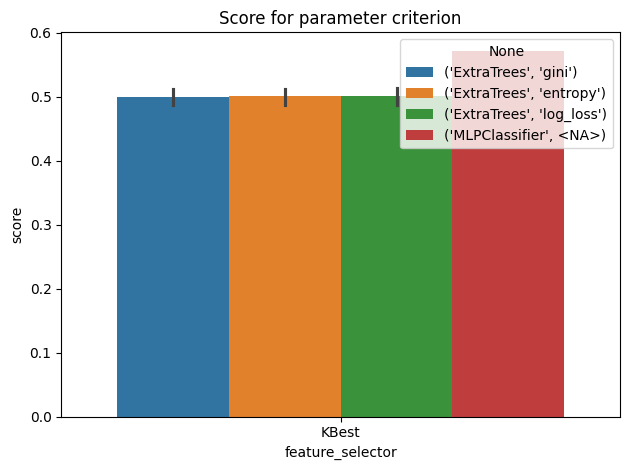

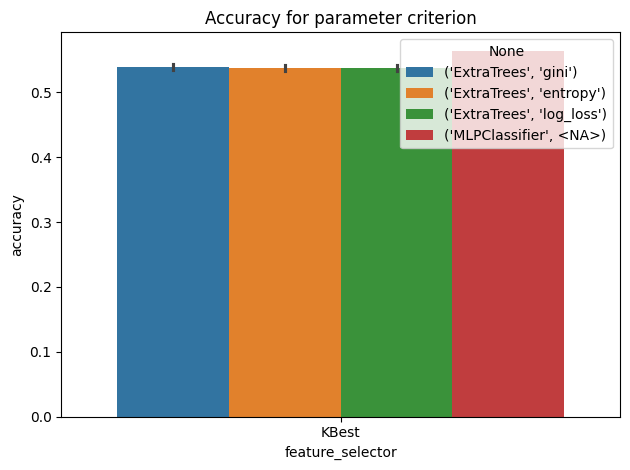

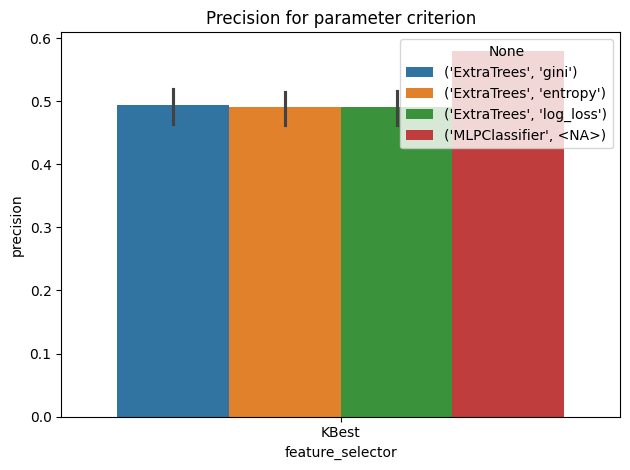

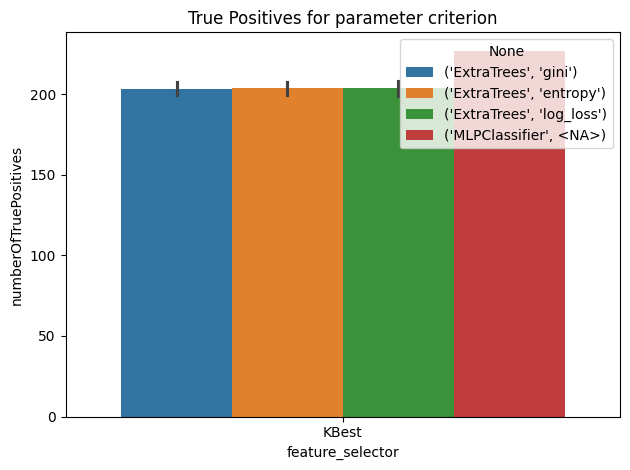

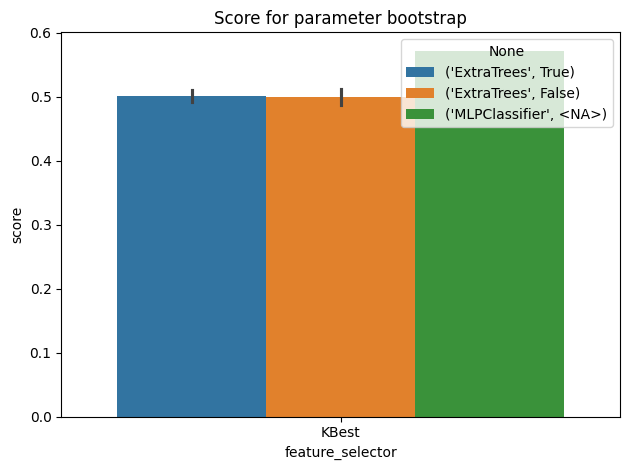

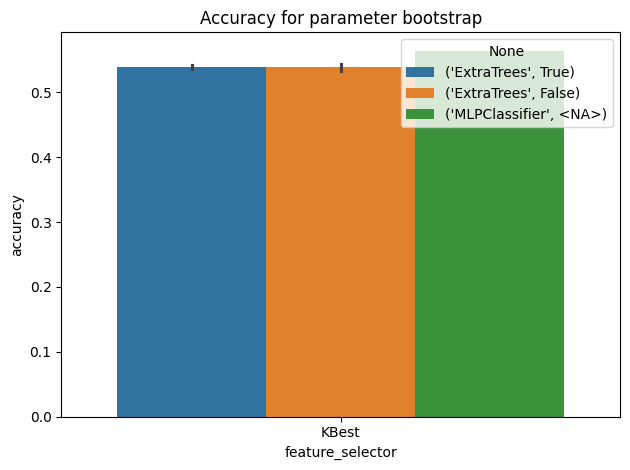

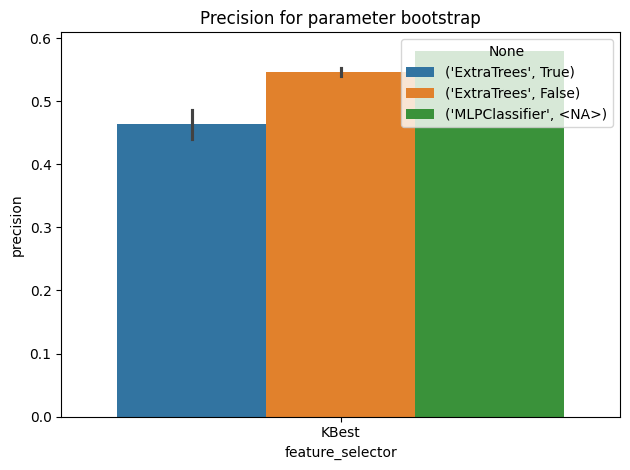

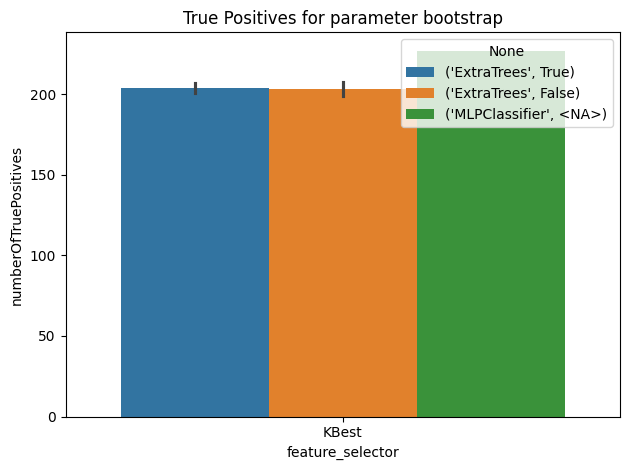

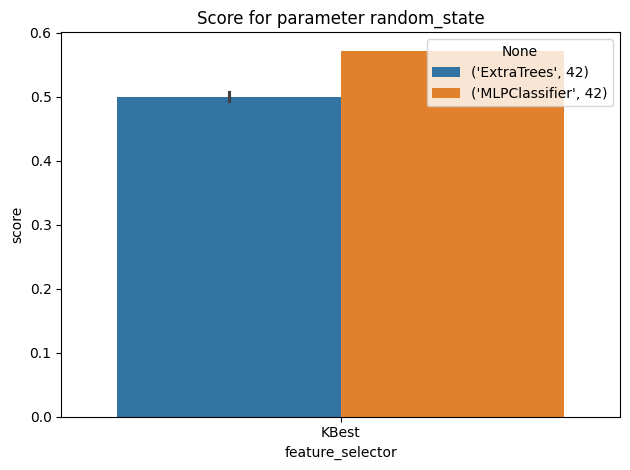

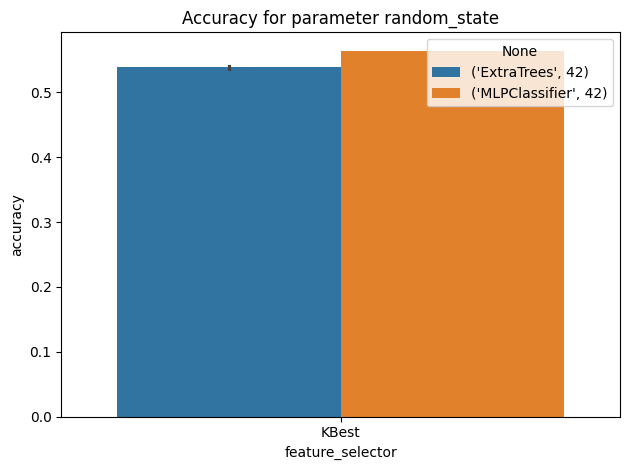

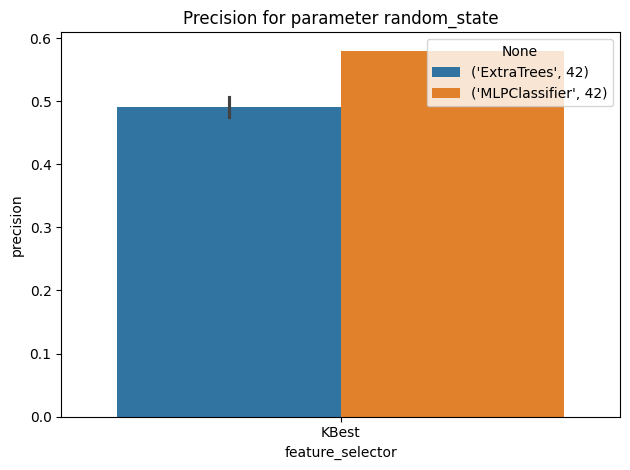

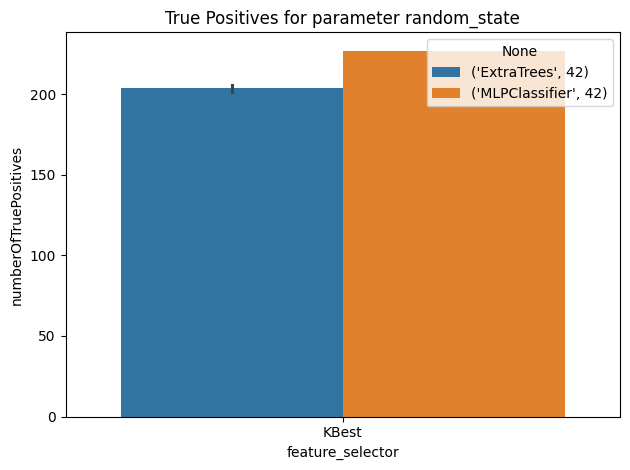

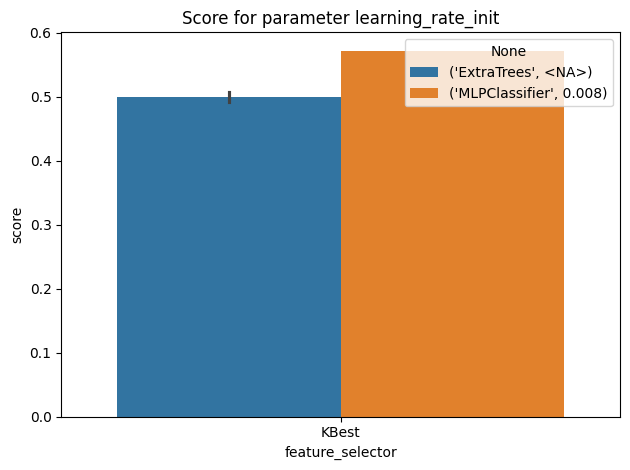

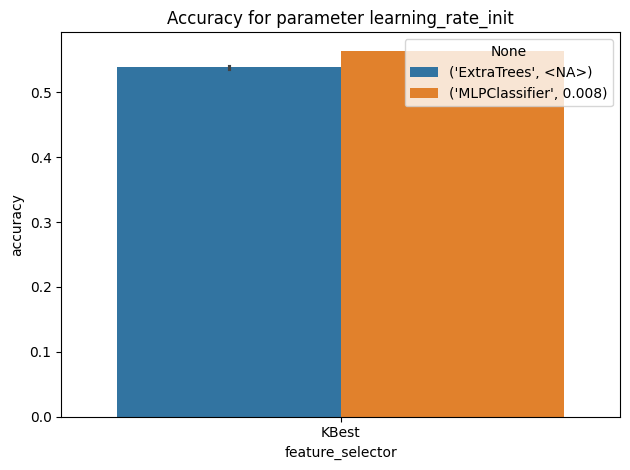

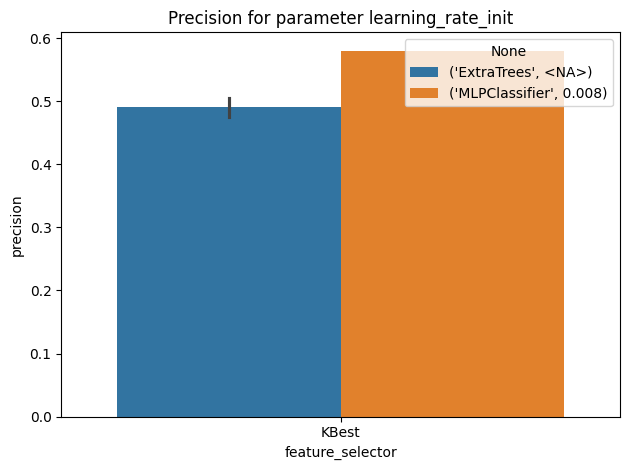

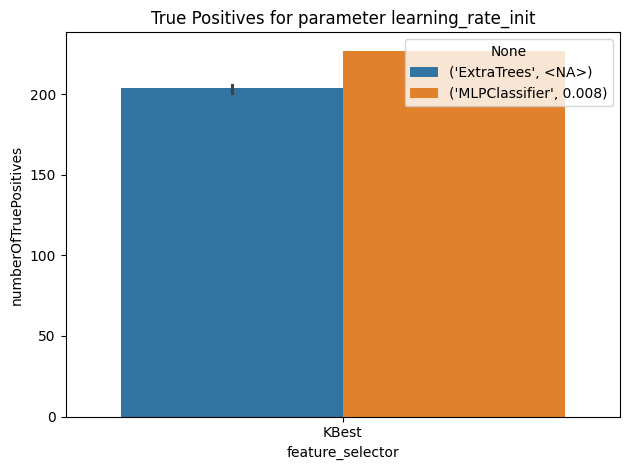

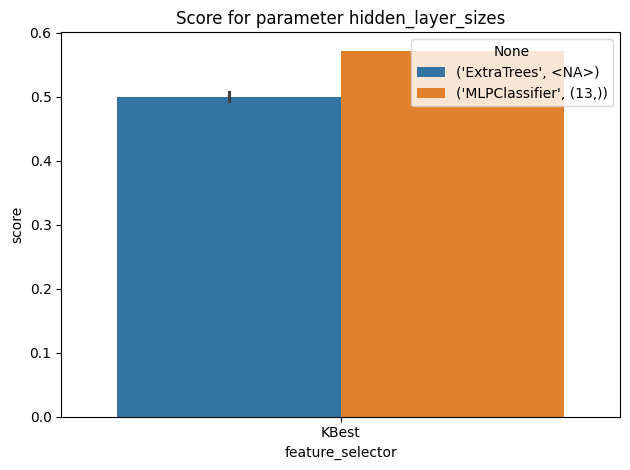

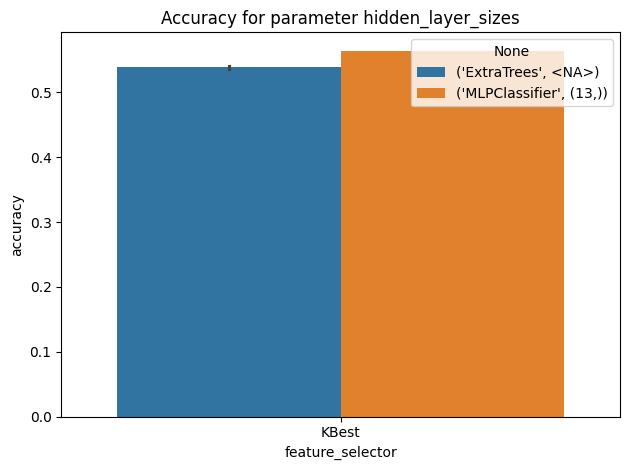

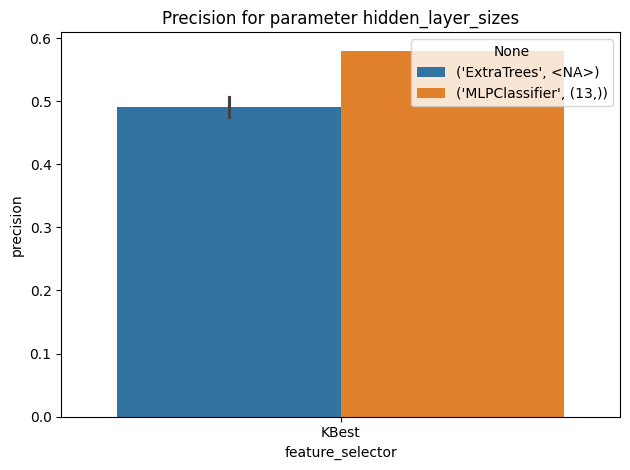

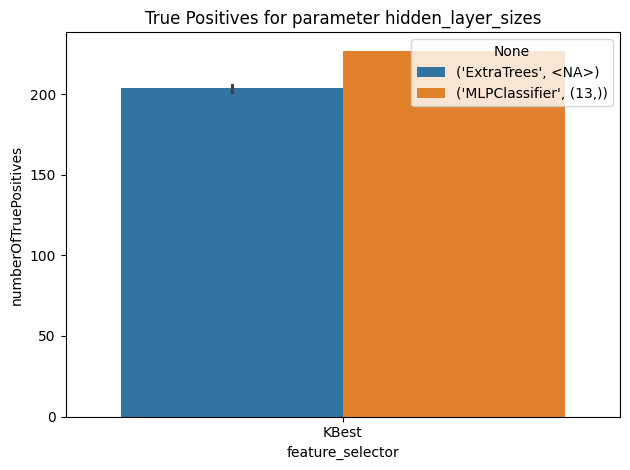

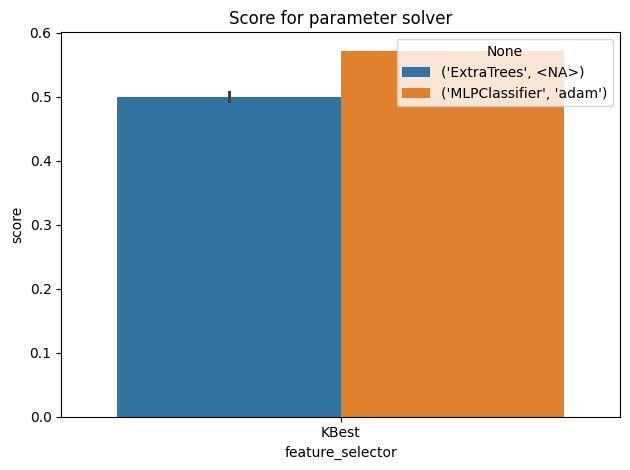

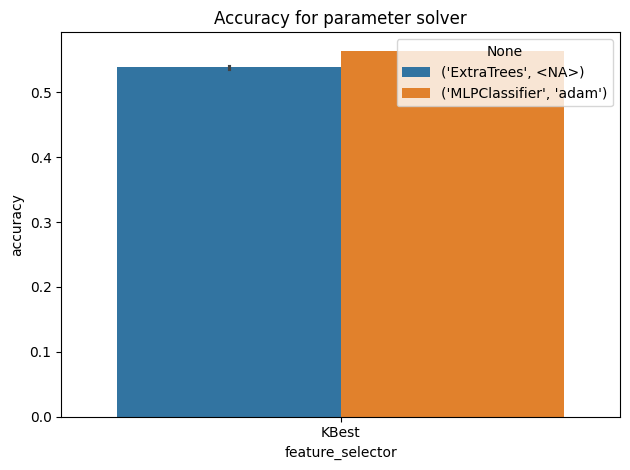

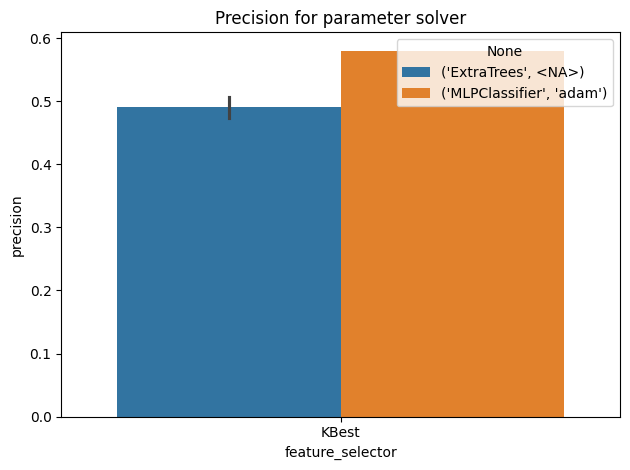

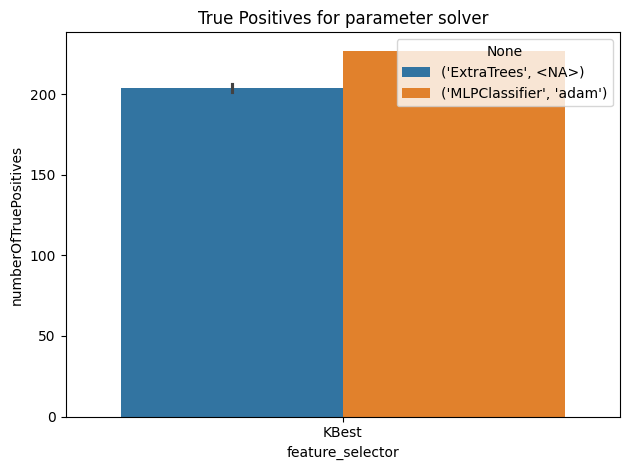

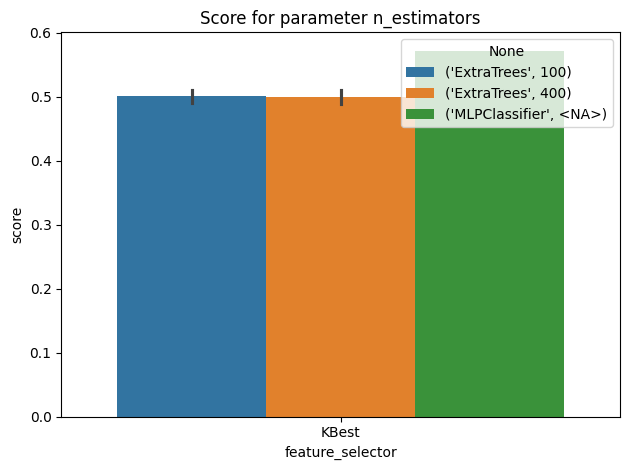

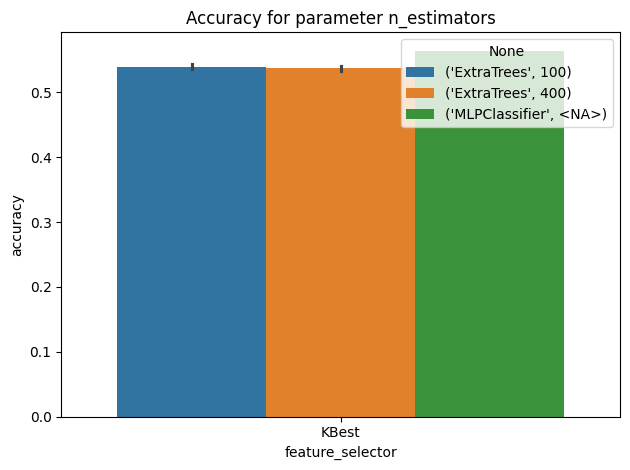

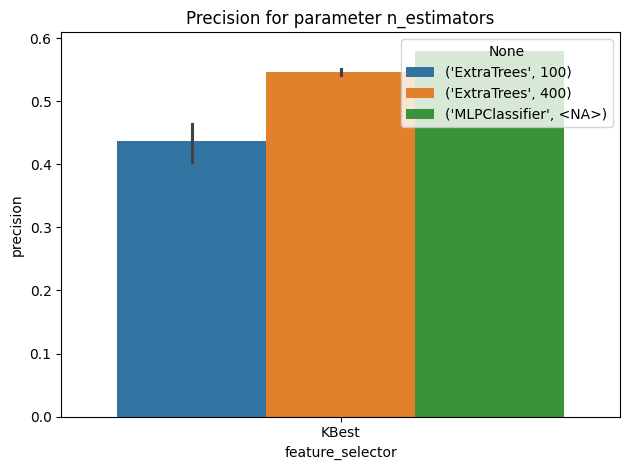

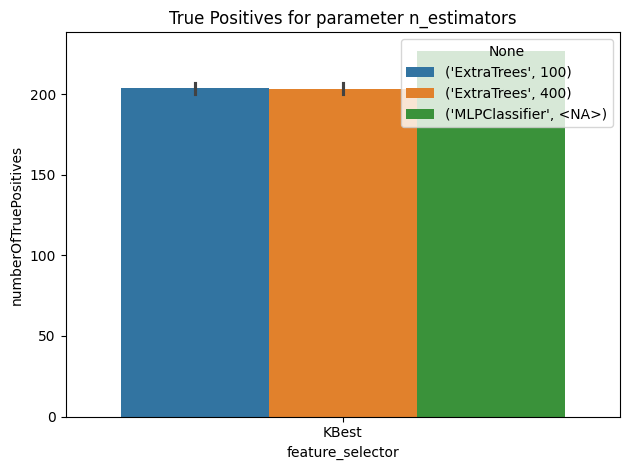

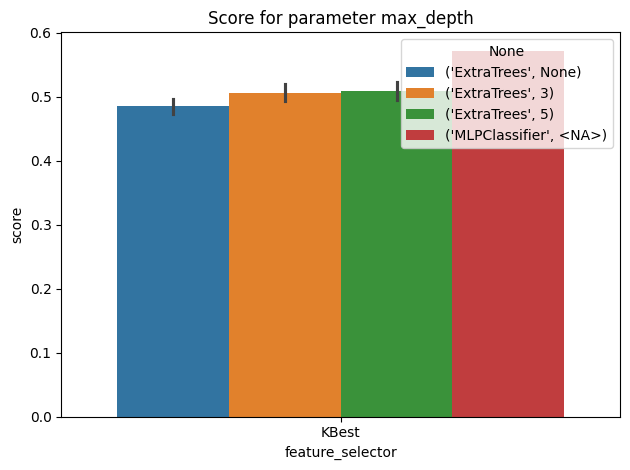

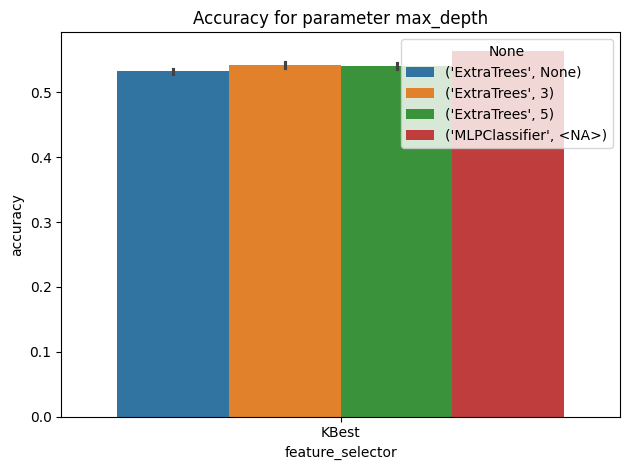

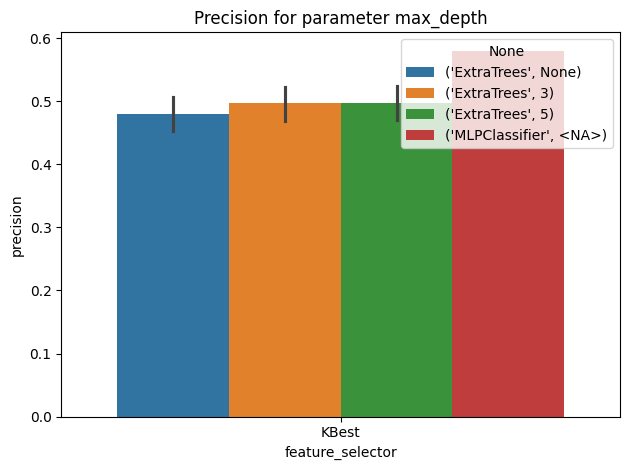

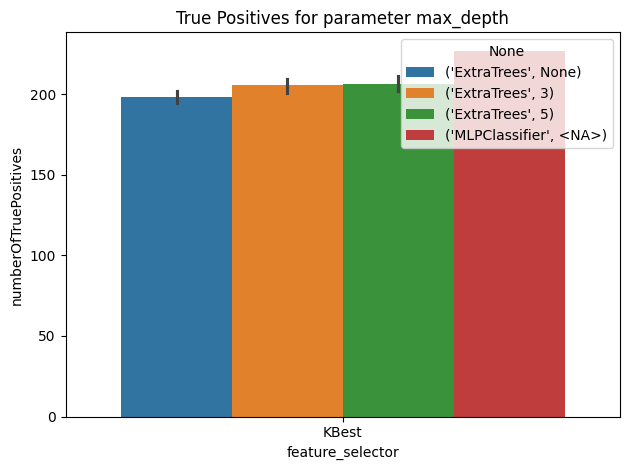

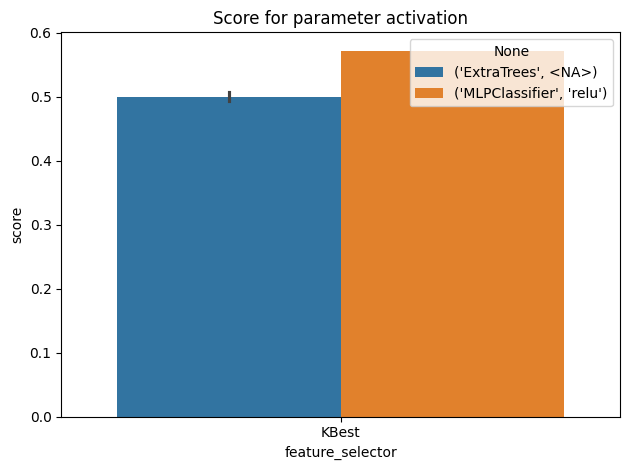

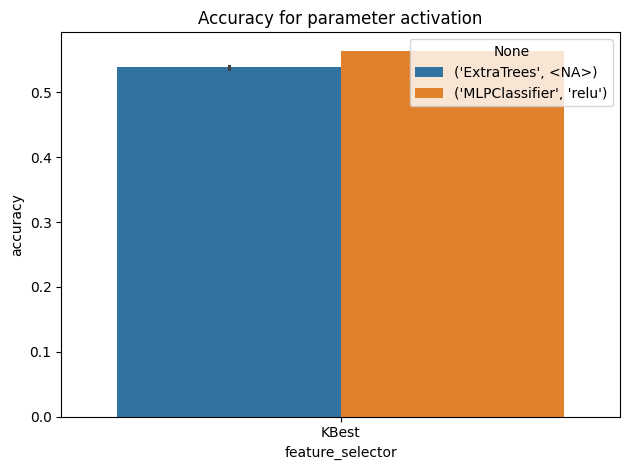

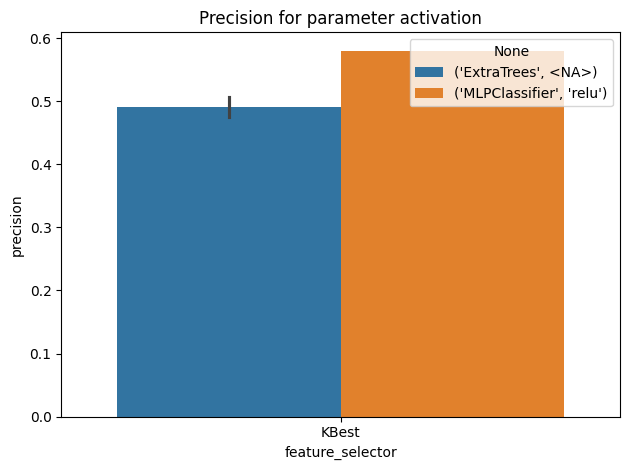

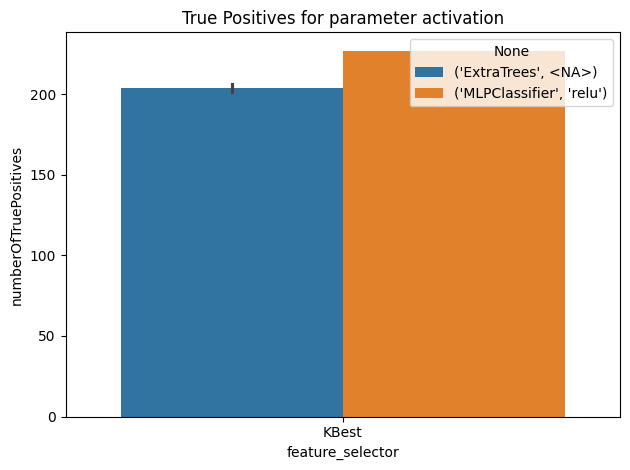

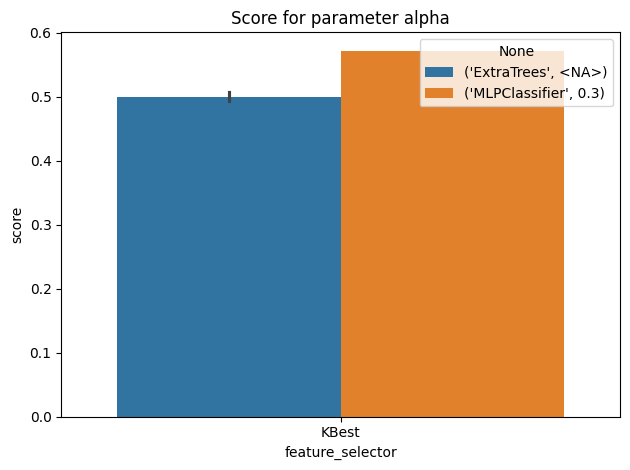

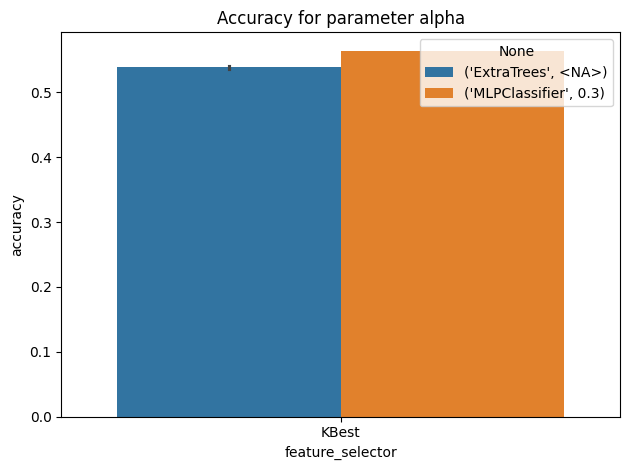

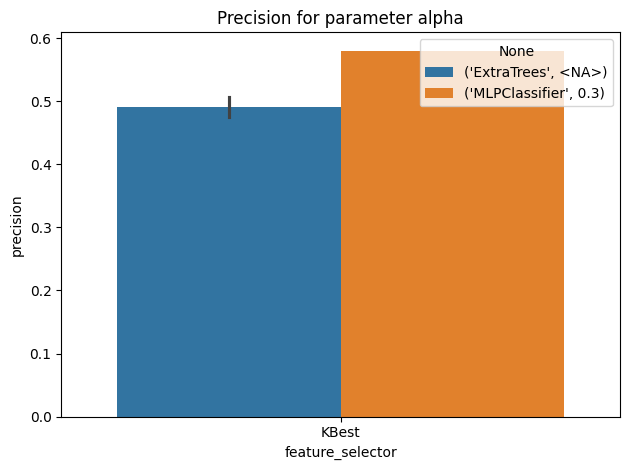

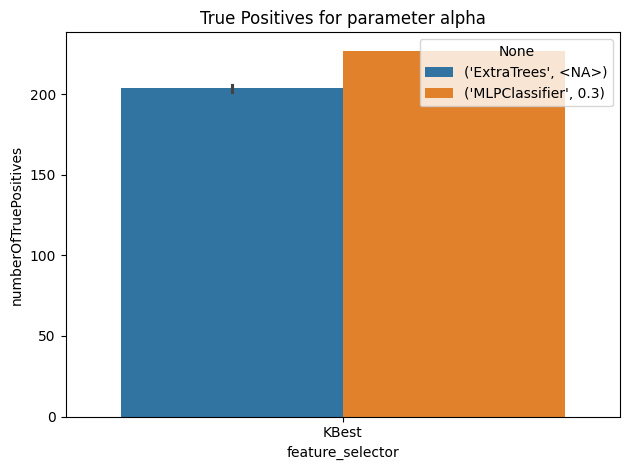

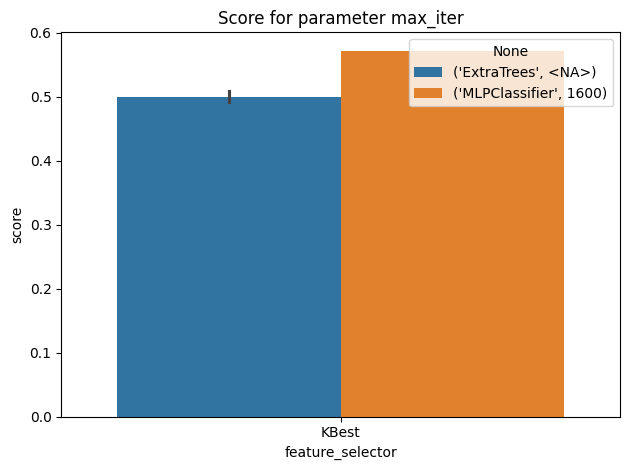

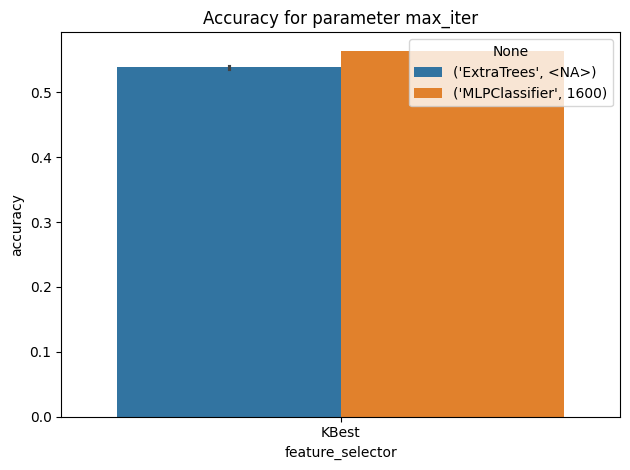

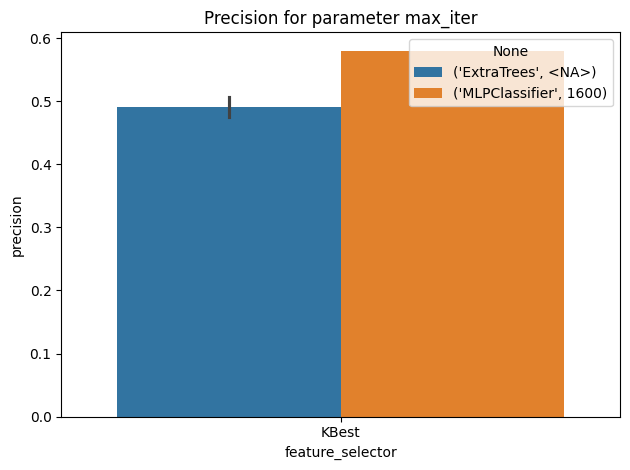

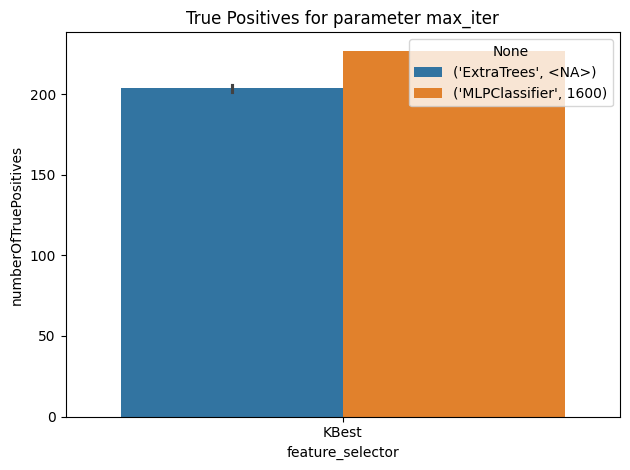

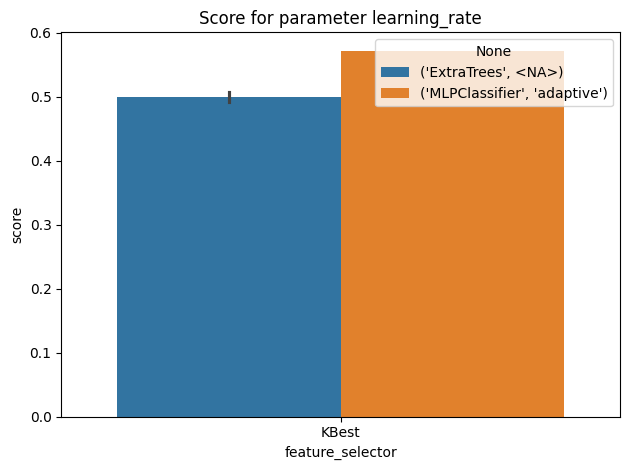

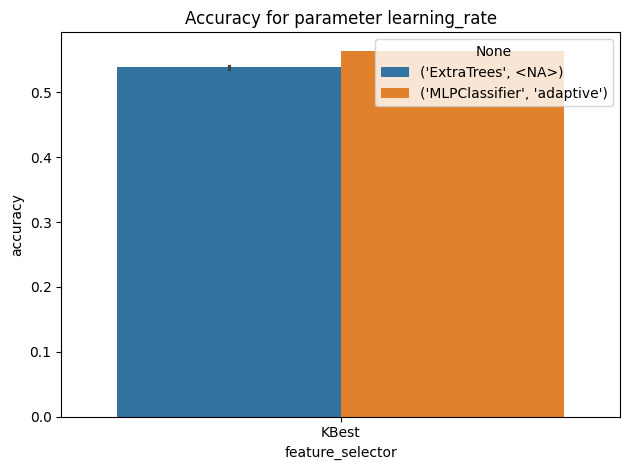

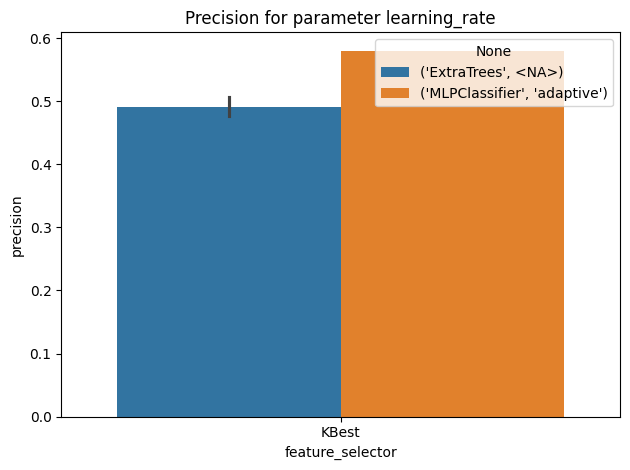

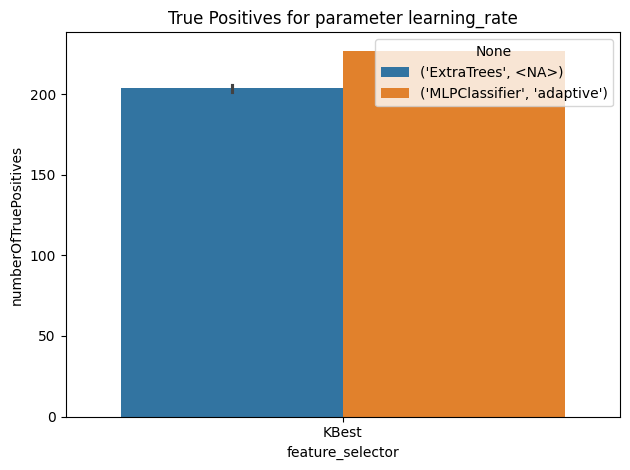

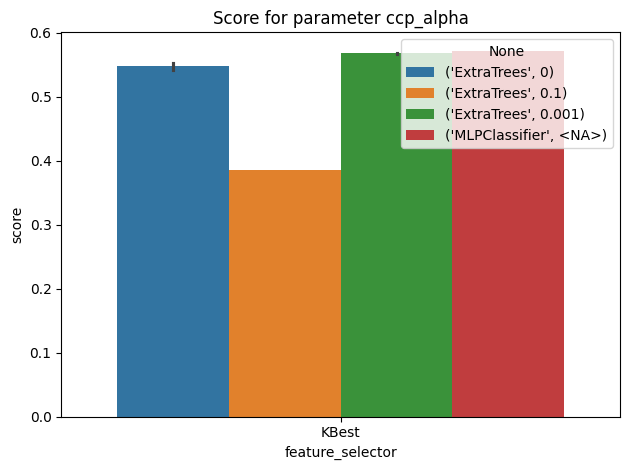

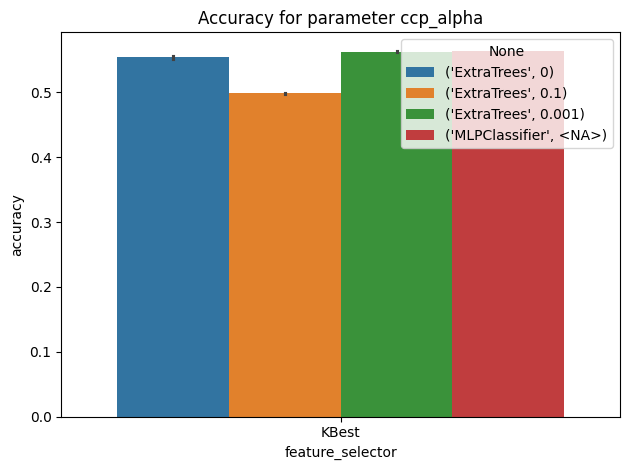

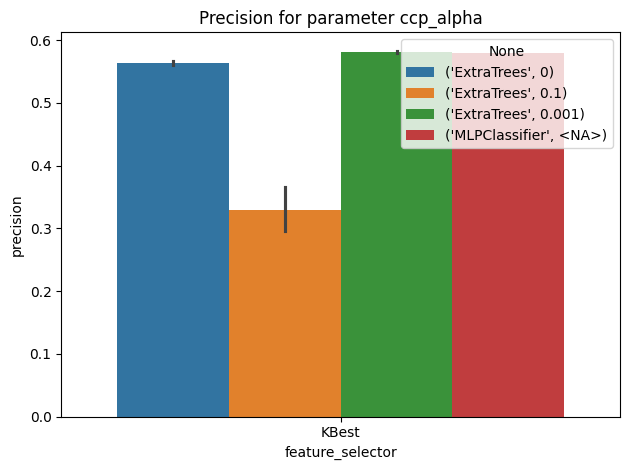

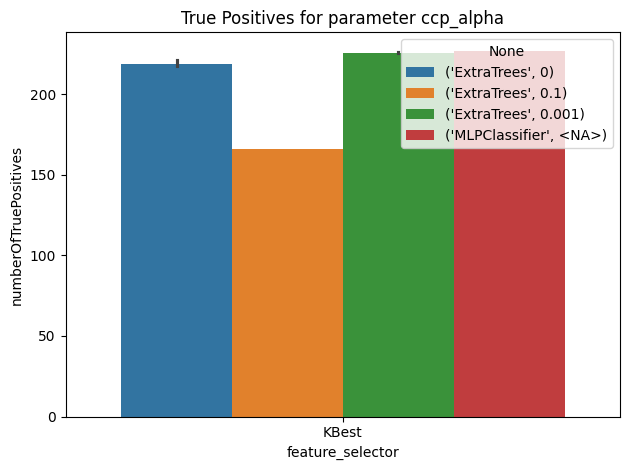

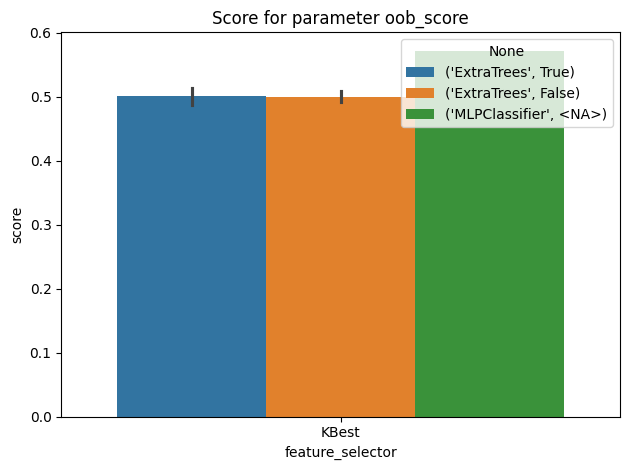

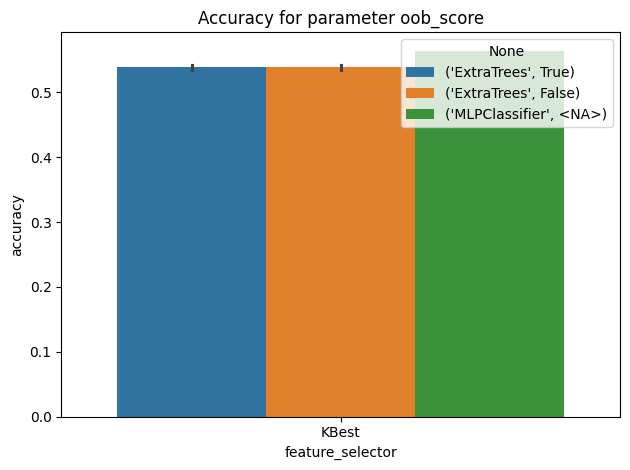

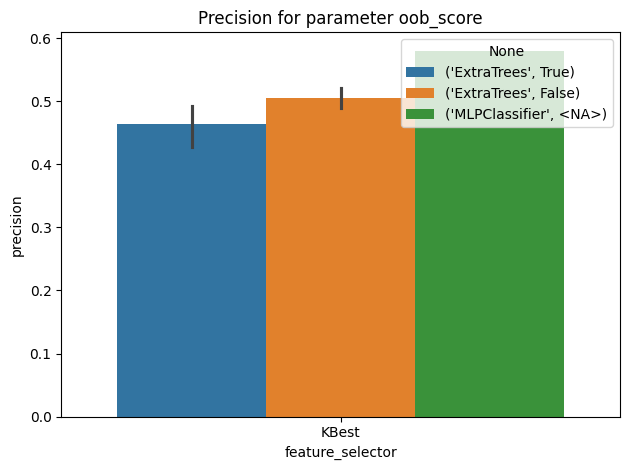

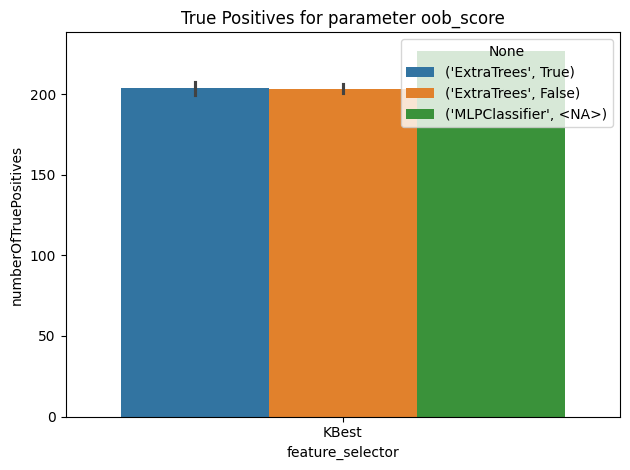

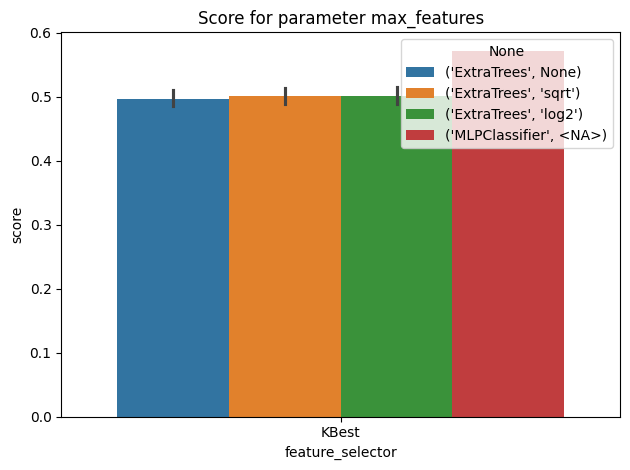

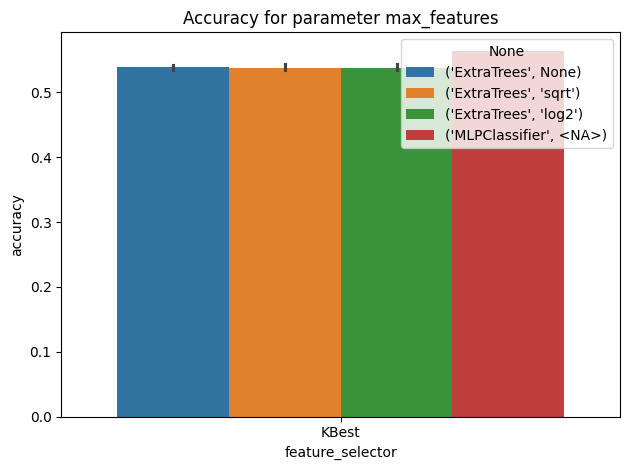

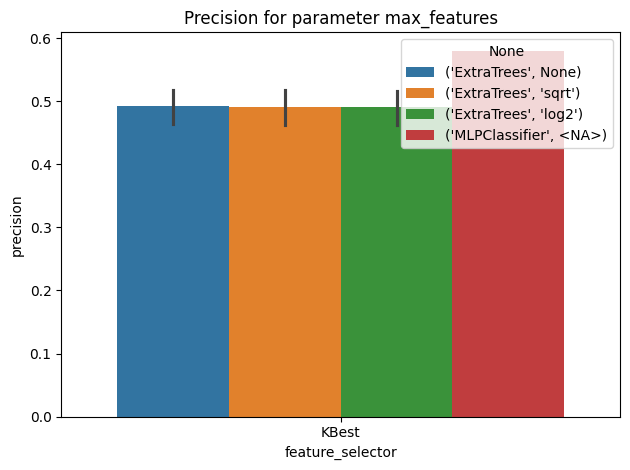

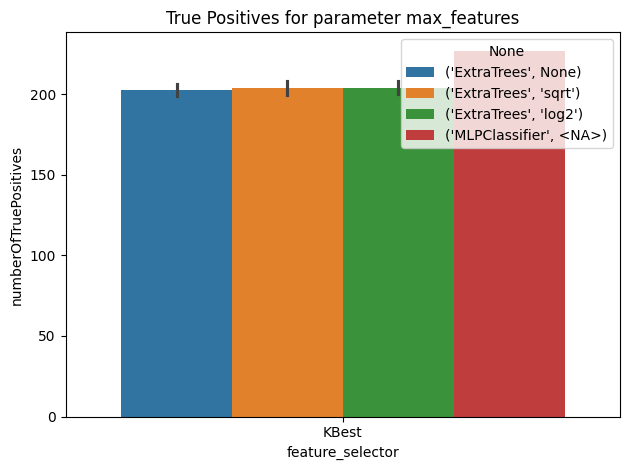

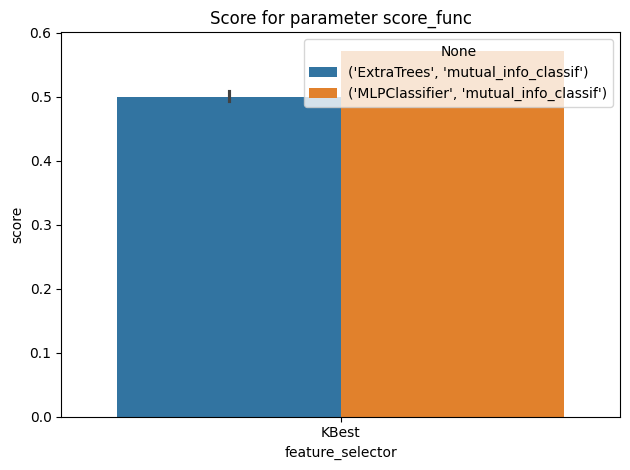

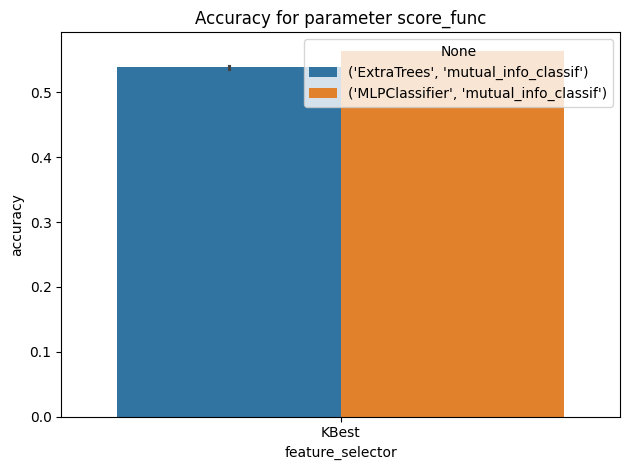

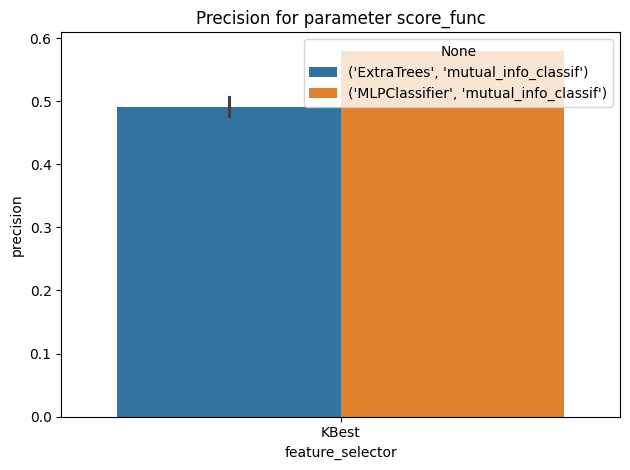

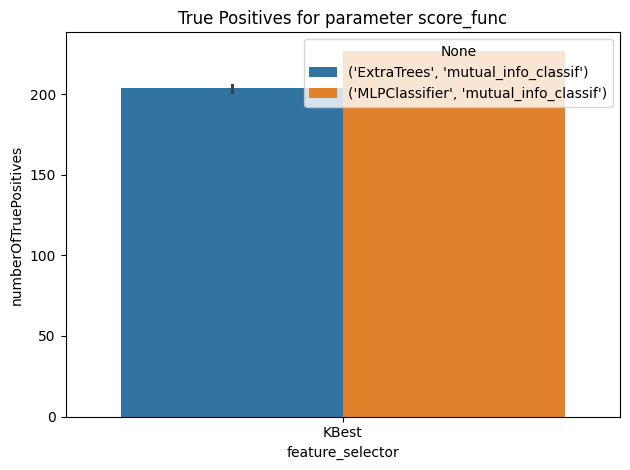

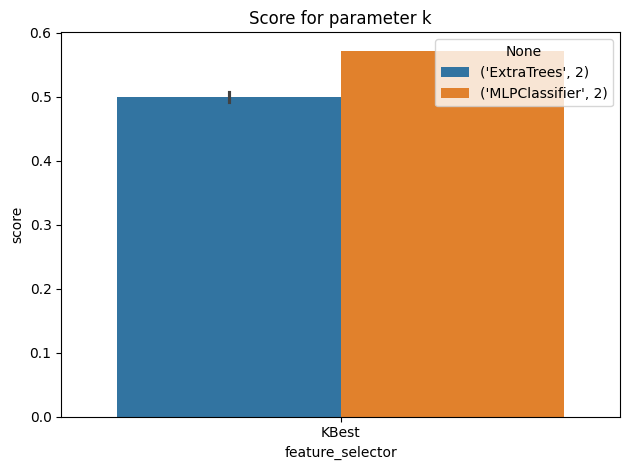

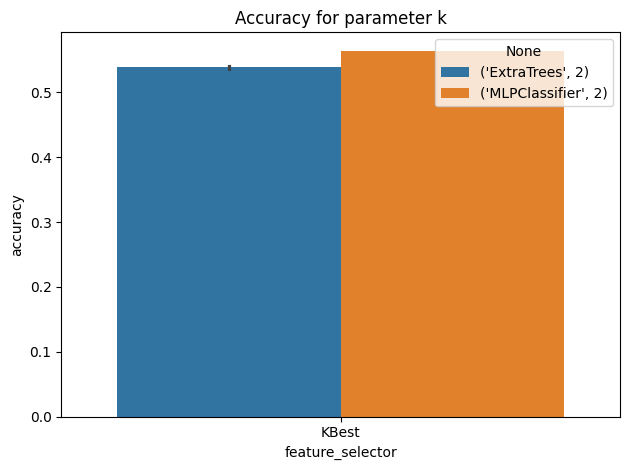

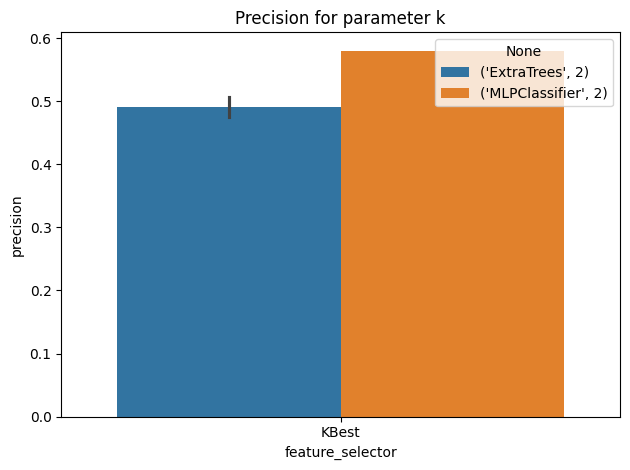

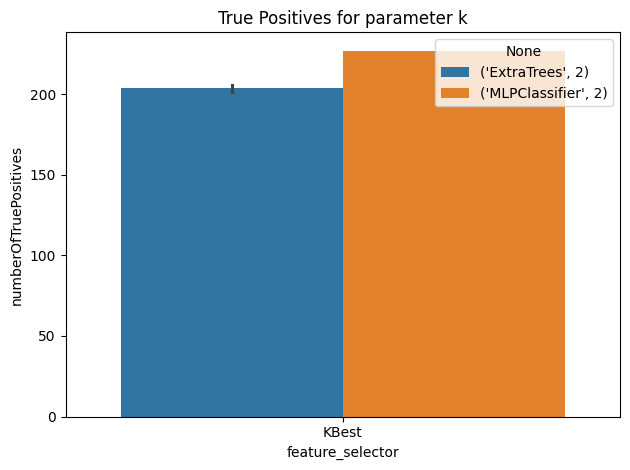

CPU times: total: 7.28 s
Wall time: 14.4 s


In [16]:
%%time
processedResultsDf, parameters = functions.extractParameterResultsArr(
    resultsDf,
    [models, featureSelectors, scalers, featureGenerators],
    [
        "model_parameters",
        "selector_parameters",
        "scaler_parameters",
        "feature_generator_parameters",
    ],
)
functions.drawParameterResultsBarplot(processedResultsDf, parameters)

### Score/Accuracy by number of features

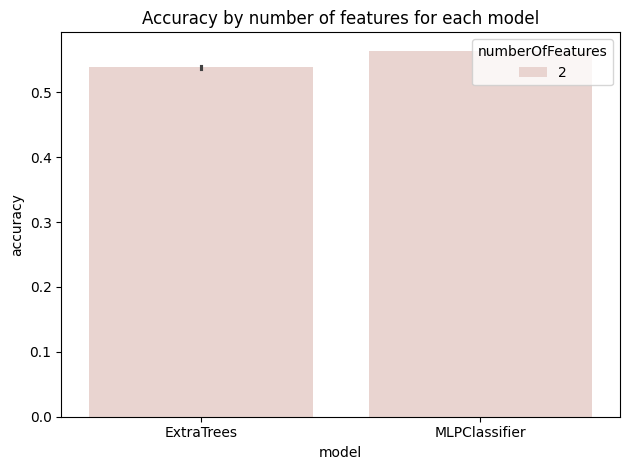

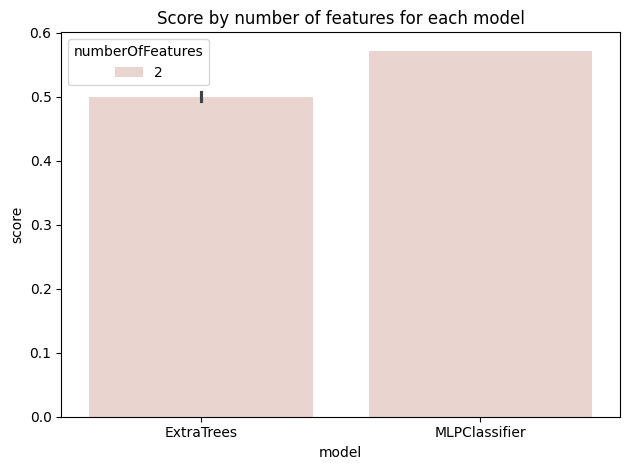

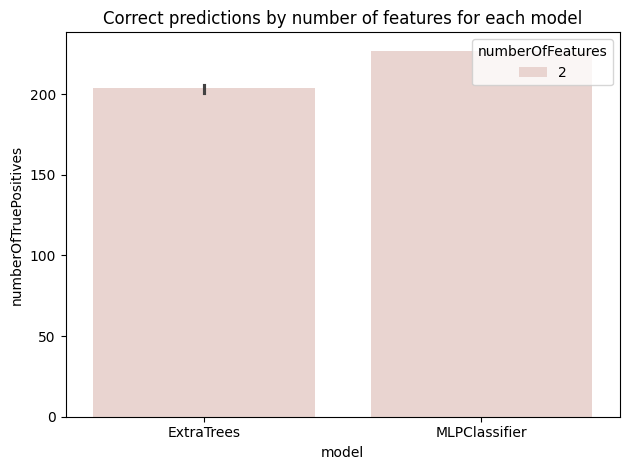

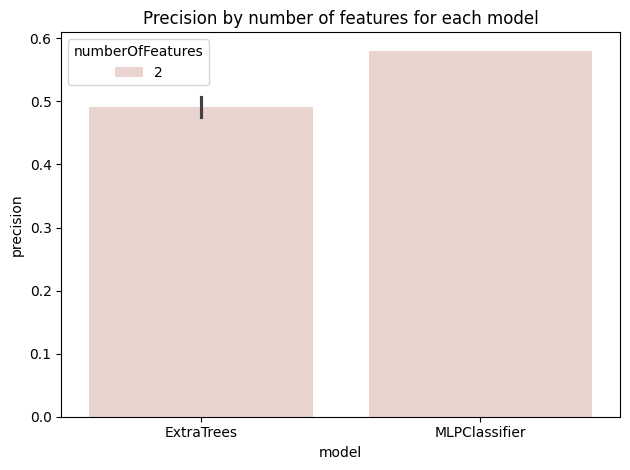

In [17]:
functions.drawResultsPerNumberOfFeatures(processedResultsDf)

### Final Results for Feature Selectors

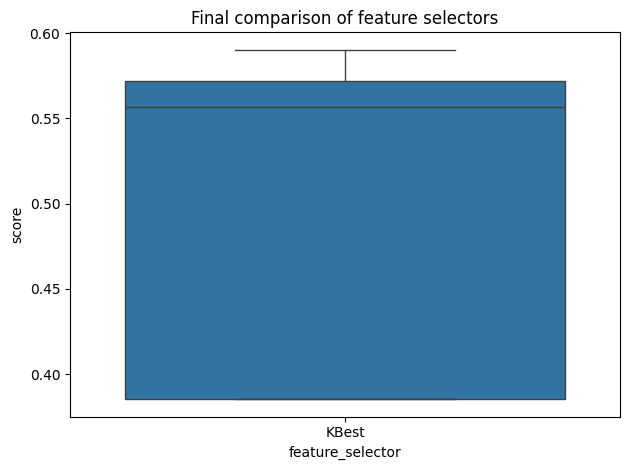

In [18]:
plt.title("Final comparison of feature selectors")
sns.boxplot(data=processedResultsDf, x="feature_selector", y="score")

plt.tight_layout()
plt.show()

<Axes: xlabel='model', ylabel='score'>

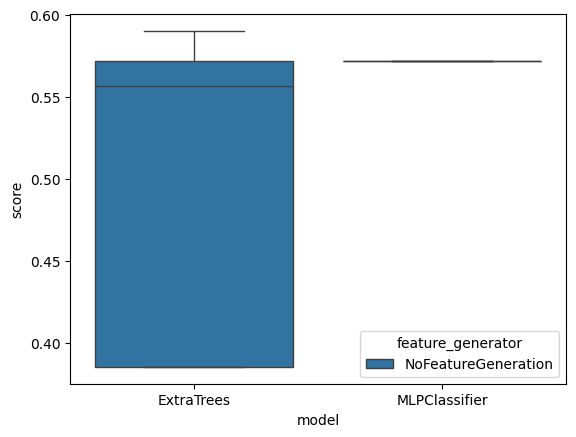

In [19]:
sns.boxplot(data=processedResultsDf, x="model", y="score", hue="feature_generator")

<Axes: xlabel='model', ylabel='score'>

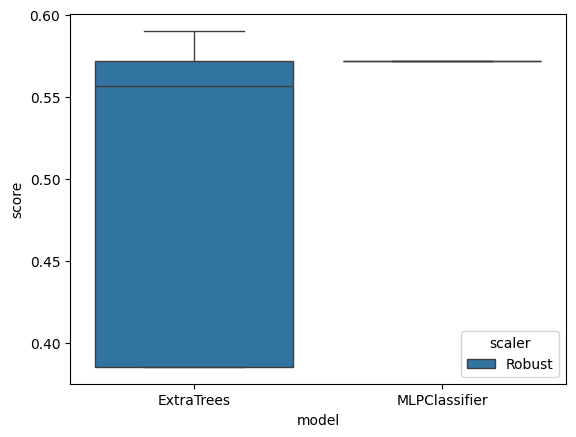

In [20]:
sns.boxplot(data=processedResultsDf, x="model", y="score", hue="scaler")

### Final Results for Models

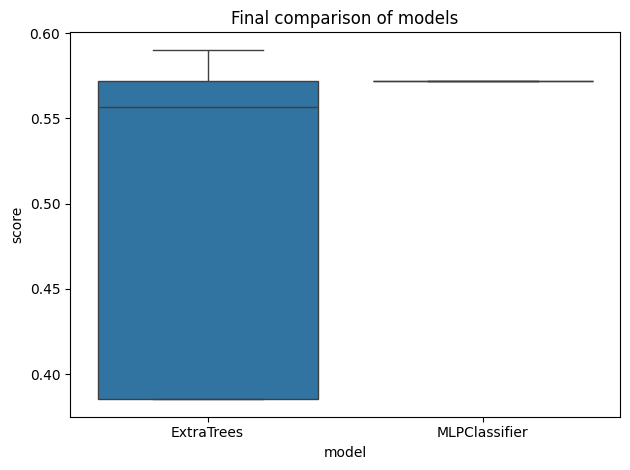

In [21]:
plt.title("Final comparison of models")
sns.boxplot(data=processedResultsDf, x="model", y="score")
plt.tight_layout()
plt.show()

### Final Results

In [22]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 1.71 ms


In [23]:
processedResultsDf[
    processedResultsDf["model"] == functions.ModelType.XGBoost.name
].sort_values(by="score", ascending=False).head(5)

Empty DataFrame
Columns: [score, numberOfTruePositives, accuracy, precision, numberOfFeatures, model, model_parameters, feature_selector, selector_parameters, scaler, scaler_parameters, feature_generator, feature_generator_parameters, model_parameters_criterion, model_parameters_bootstrap, model_parameters_random_state, model_parameters_learning_rate_init, model_parameters_hidden_layer_sizes, model_parameters_solver, model_parameters_n_estimators, model_parameters_max_depth, model_parameters_activation, model_parameters_alpha, model_parameters_max_iter, model_parameters_learning_rate, model_parameters_ccp_alpha, model_parameters_oob_score, model_parameters_max_features, selector_parameters_score_func, selector_parameters_k]
Index: []

[0 rows x 30 columns]

In [24]:
processedResultsDf.sort_values(by="numberOfTruePositives", ascending=False).head(5)

score  numberOfTruePositives  accuracy  precision  numberOfFeatures  \
147  0.590214                    233  0.563636   0.583333                 2   
237  0.590214                    233  0.563636   0.583333                 2   
66   0.590214                    233  0.563636   0.583333                 2   
234  0.590214                    233  0.563636   0.583333                 2   
72   0.590214                    233  0.563636   0.583333                 2   

          model                                   model_parameters  \
147  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
237  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
66   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
234  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
72   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   

    feature_selector                                selector_parameters  \
147            KBest  {'score_func': <function mutual_info_classif a...   
237            KBest  {'score_func': <function mutual_info_classif a...   
66             KBest  {'score_func': <function mutual_info_classif a...   
234            KBest  {'score_func': <function mutual_info_classif a...   
72             KBest  {'score_func': <function mutual_info_classif a...   

     scaler  ... model_parameters_max_depth model_parameters_activation  \
147  Robust  ...                          5                        <NA>   
237  Robust  ...                          5                        <NA>   
66   Robust  ...                          5                        <NA>   
234  Robust  ...                          5                        <NA>   
72   Robust  ...                          5                        <NA>   

    model_parameters_alpha model_parameters_max_iter  \
147                   <NA>                      <NA>   
237                   <NA>                      <NA>   
66                    <NA>                      <NA>   
234                   <NA>                      <NA>   
72                    <NA>                      <NA>   

    model_parameters_learning_rate  model_parameters_ccp_alpha  \
147                           <NA>                           0   
237                           <NA>                           0   
66                            <NA>                           0   
234                           <NA>                           0   
72                            <NA>                           0   

    model_parameters_oob_score model_parameters_max_features  \
147                      False                          sqrt   
237                      False                          log2   
66                       False                          sqrt   
234                       True                          log2   
72                        True                          log2   

    selector_parameters_score_func selector_parameters_k  
147            mutual_info_classif                     2  
237            mutual_info_classif                     2  
66             mutual_info_classif                     2  
234            mutual_info_classif                     2  
72             mutual_info_classif                     2  

[5 rows x 30 columns]

In [25]:
processedResultsDf[
    processedResultsDf["feature_generator"]
    == functions.FeatureGenerator.Polynomial.name
].sort_values(by="numberOfTruePositives", ascending=False).head(5)

Empty DataFrame
Columns: [score, numberOfTruePositives, accuracy, precision, numberOfFeatures, model, model_parameters, feature_selector, selector_parameters, scaler, scaler_parameters, feature_generator, feature_generator_parameters, model_parameters_criterion, model_parameters_bootstrap, model_parameters_random_state, model_parameters_learning_rate_init, model_parameters_hidden_layer_sizes, model_parameters_solver, model_parameters_n_estimators, model_parameters_max_depth, model_parameters_activation, model_parameters_alpha, model_parameters_max_iter, model_parameters_learning_rate, model_parameters_ccp_alpha, model_parameters_oob_score, model_parameters_max_features, selector_parameters_score_func, selector_parameters_k]
Index: []

[0 rows x 30 columns]

In [26]:
processedResultsDf[
    processedResultsDf["scaler"] == functions.Scaler.NoScaling.name
].sort_values(by="score", ascending=False).head(5)

Empty DataFrame
Columns: [score, numberOfTruePositives, accuracy, precision, numberOfFeatures, model, model_parameters, feature_selector, selector_parameters, scaler, scaler_parameters, feature_generator, feature_generator_parameters, model_parameters_criterion, model_parameters_bootstrap, model_parameters_random_state, model_parameters_learning_rate_init, model_parameters_hidden_layer_sizes, model_parameters_solver, model_parameters_n_estimators, model_parameters_max_depth, model_parameters_activation, model_parameters_alpha, model_parameters_max_iter, model_parameters_learning_rate, model_parameters_ccp_alpha, model_parameters_oob_score, model_parameters_max_features, selector_parameters_score_func, selector_parameters_k]
Index: []

[0 rows x 30 columns]

In [27]:
filteredDf["scaler"]

63     Robust
66     Robust
72     Robust
75     Robust
144    Robust
147    Robust
153    Robust
156    Robust
225    Robust
228    Robust
234    Robust
237    Robust
Name: scaler, dtype: object

In [28]:
filteredDf["model_parameters"].to_numpy()

array([{'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0},
 

In [29]:
filteredDf["feature_generator"]

63     NoFeatureGeneration
66     NoFeatureGeneration
72     NoFeatureGeneration
75     NoFeatureGeneration
144    NoFeatureGeneration
147    NoFeatureGeneration
153    NoFeatureGeneration
156    NoFeatureGeneration
225    NoFeatureGeneration
228    NoFeatureGeneration
234    NoFeatureGeneration
237    NoFeatureGeneration
Name: feature_generator, dtype: object

In [30]:
filteredDf

score  numberOfTruePositives  accuracy  precision  numberOfFeatures  \
63   0.590214                    233  0.563636   0.583333                 2   
66   0.590214                    233  0.563636   0.583333                 2   
72   0.590214                    233  0.563636   0.583333                 2   
75   0.590214                    233  0.563636   0.583333                 2   
144  0.590214                    233  0.563636   0.583333                 2   
147  0.590214                    233  0.563636   0.583333                 2   
153  0.590214                    233  0.563636   0.583333                 2   
156  0.590214                    233  0.563636   0.583333                 2   
225  0.590214                    233  0.563636   0.583333                 2   
228  0.590214                    233  0.563636   0.583333                 2   
234  0.590214                    233  0.563636   0.583333                 2   
237  0.590214                    233  0.563636   0.583333                 2   

          model                                   model_parameters  \
63   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
66   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
72   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
75   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
144  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
147  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
153  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
156  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
225  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
228  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
234  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
237  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   

    feature_selector                                selector_parameters  \
63             KBest  {'score_func': <function mutual_info_classif a...   
66             KBest  {'score_func': <function mutual_info_classif a...   
72             KBest  {'score_func': <function mutual_info_classif a...   
75             KBest  {'score_func': <function mutual_info_classif a...   
144            KBest  {'score_func': <function mutual_info_classif a...   
147            KBest  {'score_func': <function mutual_info_classif a...   
153            KBest  {'score_func': <function mutual_info_classif a...   
156            KBest  {'score_func': <function mutual_info_classif a...   
225            KBest  {'score_func': <function mutual_info_classif a...   
228            KBest  {'score_func': <function mutual_info_classif a...   
234            KBest  {'score_func': <function mutual_info_classif a...   
237            KBest  {'score_func': <function mutual_info_classif a...   

     scaler  ... model_parameters_max_depth model_parameters_activation  \
63   Robust  ...                          5                        <NA>   
66   Robust  ...                          5                        <NA>   
72   Robust  ...                          5                        <NA>   
75   Robust  ...                          5                        <NA>   
144  Robust  ...                          5                        <NA>   
147  Robust  ...                          5                        <NA>   
153  Robust  ...                          5                        <NA>   
156  Robust  ...                          5                        <NA>   
225  Robust  ...                          5                        <NA>   
228  Robust  ...                          5                        <NA>   
234  Robust  ...                          5                        <NA>   
237  Robust  ...                          5                        <NA>   

    model_parameters_alpha model_parameters_max_iter  \
63                    <NA>                      <NA>   
66   

In [31]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 0 ns


In [32]:
processedResultsDf[
    processedResultsDf["scaler"] == functions.Scaler.NoScaling.name
].sort_values(by="score", ascending=False).head(5)

Empty DataFrame
Columns: [score, numberOfTruePositives, accuracy, precision, numberOfFeatures, model, model_parameters, feature_selector, selector_parameters, scaler, scaler_parameters, feature_generator, feature_generator_parameters, model_parameters_criterion, model_parameters_bootstrap, model_parameters_random_state, model_parameters_learning_rate_init, model_parameters_hidden_layer_sizes, model_parameters_solver, model_parameters_n_estimators, model_parameters_max_depth, model_parameters_activation, model_parameters_alpha, model_parameters_max_iter, model_parameters_learning_rate, model_parameters_ccp_alpha, model_parameters_oob_score, model_parameters_max_features, selector_parameters_score_func, selector_parameters_k]
Index: []

[0 rows x 30 columns]

In [33]:
filteredDf["scaler"]

63     Robust
66     Robust
72     Robust
75     Robust
144    Robust
147    Robust
153    Robust
156    Robust
225    Robust
228    Robust
234    Robust
237    Robust
Name: scaler, dtype: object

In [34]:
filteredDf["model_parameters"].to_numpy()

array([{'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0},
 

In [35]:
filteredDf["feature_generator"]

63     NoFeatureGeneration
66     NoFeatureGeneration
72     NoFeatureGeneration
75     NoFeatureGeneration
144    NoFeatureGeneration
147    NoFeatureGeneration
153    NoFeatureGeneration
156    NoFeatureGeneration
225    NoFeatureGeneration
228    NoFeatureGeneration
234    NoFeatureGeneration
237    NoFeatureGeneration
Name: feature_generator, dtype: object

In [36]:
filteredDf

score  numberOfTruePositives  accuracy  precision  numberOfFeatures  \
63   0.590214                    233  0.563636   0.583333                 2   
66   0.590214                    233  0.563636   0.583333                 2   
72   0.590214                    233  0.563636   0.583333                 2   
75   0.590214                    233  0.563636   0.583333                 2   
144  0.590214                    233  0.563636   0.583333                 2   
147  0.590214                    233  0.563636   0.583333                 2   
153  0.590214                    233  0.563636   0.583333                 2   
156  0.590214                    233  0.563636   0.583333                 2   
225  0.590214                    233  0.563636   0.583333                 2   
228  0.590214                    233  0.563636   0.583333                 2   
234  0.590214                    233  0.563636   0.583333                 2   
237  0.590214                    233  0.563636   0.583333                 2   

          model                                   model_parameters  \
63   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
66   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
72   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
75   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
144  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
147  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
153  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
156  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
225  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
228  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
234  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
237  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   

    feature_selector                                selector_parameters  \
63             KBest  {'score_func': <function mutual_info_classif a...   
66             KBest  {'score_func': <function mutual_info_classif a...   
72             KBest  {'score_func': <function mutual_info_classif a...   
75             KBest  {'score_func': <function mutual_info_classif a...   
144            KBest  {'score_func': <function mutual_info_classif a...   
147            KBest  {'score_func': <function mutual_info_classif a...   
153            KBest  {'score_func': <function mutual_info_classif a...   
156            KBest  {'score_func': <function mutual_info_classif a...   
225            KBest  {'score_func': <function mutual_info_classif a...   
228            KBest  {'score_func': <function mutual_info_classif a...   
234            KBest  {'score_func': <function mutual_info_classif a...   
237            KBest  {'score_func': <function mutual_info_classif a...   

     scaler  ... model_parameters_max_depth model_parameters_activation  \
63   Robust  ...                          5                        <NA>   
66   Robust  ...                          5                        <NA>   
72   Robust  ...                          5                        <NA>   
75   Robust  ...                          5                        <NA>   
144  Robust  ...                          5                        <NA>   
147  Robust  ...                          5                        <NA>   
153  Robust  ...                          5                        <NA>   
156  Robust  ...                          5                        <NA>   
225  Robust  ...                          5                        <NA>   
228  Robust  ...                          5                        <NA>   
234  Robust  ...                          5                        <NA>   
237  Robust  ...                          5                        <NA>   

    model_parameters_alpha model_parameters_max_iter  \
63                    <NA>                      <NA>   
66   

# Batch 2

## Consts

In [ ]:
RESULTS_FILENAME = "./Results/Limited/ExtraTrees/results-2"

## Experiment

### Parameters

In [ ]:
n_estimators = [100, 150,50]
criterion = ["gini"]
max_depth = [4,5,6]
min_samples_split = [2, 4]
min_samples_leaf = [1, 2]
min_weight_fraction_leaf = [0, 0.1, 0.001]
max_features = ["sqrt"]
max_leaf_nodes = [None, 1, 2]
min_impurity_decrease = [0, 0.1, 0.001]
bootstrap = [True]
oob_score = [True]
random_state = [42]
class_weight = [None, "balanced", "balanced_subsample", ]
ccp_alpha = [0]

extraTreesParameters = functions.generateParameters(
    [
        n_estimators,
        criterion,
        max_depth,
        min_samples_split,
        min_samples_leaf,
        min_weight_fraction_leaf,
        max_features,
        #max_leaf_nodes,
        #min_impurity_decrease,
        bootstrap,
        oob_score,
        random_state,
        #class_weight,
        ccp_alpha,
    ],
    globals(),
)
activation = ["relu"]

beta_1=[0.95]
beta_2=[0.999]
solver = ["adam"]
alpha = [0.3]
learning_rate = ["adaptive"]
learning_rate_init = [0.008]
hidden_layer_sizes = [
    (13,),
]
max_iter = [1600]
random_state = [42]
mlpClassifierParameters = functions.generateParameters(
    [
        activation,
        solver,
        alpha,
        learning_rate,
        learning_rate_init,
        hidden_layer_sizes,
        max_iter,
        random_state,
    ],
    globals(),
)

models = [
    {"model": functions.ModelType.ExtraTrees, "parameters": extraTreesParameters},
    {"model": functions.ModelType.MLPClassifier, "parameters": mlpClassifierParameters},
]

In [ ]:
# KBest
k = [2]
score_func = [mutual_info_classif]
kBestParameters = functions.generateParameters([score_func, k], globals())

# FPR

# mutual_info_classif seems to break for FPR but maybe try to run these without StandardScaler?
score_func = [f_classif]
alpha = [0.01]
fprParameters = functions.generateParameters([score_func, alpha], globals())


# RFE
estimator = [SVC(kernel="linear")]
n_features_to_select = [2, 3]
step = [0.9]
rfeParameters = functions.generateParameters(
    [estimator, n_features_to_select, step], globals()
)


featureSelectors = [
    {"model": functions.FeatureSelectorType.KBest, "parameters": kBestParameters},
    # {"model": functions.FeatureSelectorType.FPR, "parameters": fprParameters},
    # {"model": functions.FeatureSelectorType.RFE, "parameters": rfeParameters},
]

In [ ]:
scalers = [
    # {"model": functions.Scaler.NoScaling, "parameters": [{}]},
    # {"model": functions.Scaler.Standard, "parameters": [{}]},
    {"model": functions.Scaler.Robust, "parameters": [{}]},
]

degree = [2]

polynomialParameters = functions.generateParameters([degree], globals())

featureGenerators = [
    {"model": functions.FeatureGenerator.NoFeatureGeneration, "parameters": [{}]},
    #{
     #   "model": functions.FeatureGenerator.Polynomial,
      #  "parameters": polynomialParameters,
    #},
]

### Conducting the experiment

In [ ]:
y_train_ravel = np.ravel(y_train, order="C")
y_train_ravel = y_train_ravel.astype(int)

In [ ]:
%%time
results = functions.conductExperimentsWithScalersAndGenerators(
    models=models,
    featureSelectors=featureSelectors,
    X_orig=X_train,
    y_orig=y_train_ravel,
    scalers=scalers,
    featureGenerators=featureGenerators,
    getLimitedScore=True,
    limit=0.45,
)
with open(RESULTS_FILENAME, "wb") as f:
    pickle.dump(results, f)

Performed Experiment 1/649(approx) took (s): model: 2.01 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 2/649(approx) took (s): model: 1.55 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 3/649(approx) took (s): model: 2.19 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 4/649(approx) took (s): model: 1.34 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 5/649(approx) took (s): model: 2.16 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 6/649(approx) took (s): model: 2.03 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_esti

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 11/649(approx) took (s): model: 1.6 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 12/649(approx) took (s): model: 1.64 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 13/649(approx) took (s): model: 0.8 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 14/649(approx) took (s): model: 1.38 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 15/649(approx) took (s): model: 1.38 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 20/649(approx) took (s): model: 1.23 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 21/649(approx) took (s): model: 1.37 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 22/649(approx) took (s): model: 0.83 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 23/649(approx) took (s): model: 1.21 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 24/649(approx) took (s): model: 1.23 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 29/649(approx) took (s): model: 0.51 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 30/649(approx) took (s): model: 0.53 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 31/649(approx) took (s): model: 0.48 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 32/649(approx) took (s): model: 0.44 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 33/649(approx) took (s): model: 0.35 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimato

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 38/649(approx) took (s): model: 0.4 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 39/649(approx) took (s): model: 0.33 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 40/649(approx) took (s): model: 0.24 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 42/649(approx) took (s): model: 0.22 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_esti

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 47/649(approx) took (s): model: 0.32 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 48/649(approx) took (s): model: 0.28 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 49/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 50/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 51/649(approx) took (s): model: 0.19 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_esti

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 57/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 58/649(approx) took (s): model: 0.17 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 59/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 60/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimato

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 65/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 66/649(approx) took (s): model: 0.21 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 67/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x00000

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 69/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_esti

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 75/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 76/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 77/649(approx) took (s): model: 0.17 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 78/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_esti

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 83/649(approx) took (s): model: 0.5 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 84/649(approx) took (s): model: 0.53 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 85/649(approx) took (s): model: 0.35 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 86/649(approx) took (s): model: 0.43 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 87/649(approx) took (s): model: 0.45 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees 

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 92/649(approx) took (s): model: 0.45 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 93/649(approx) took (s): model: 0.49 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 94/649(approx) took (s): model: 0.32 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classi

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 95/649(approx) took (s): model: 0.42 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 96/649(approx) took (s): model: 0.43 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTr

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 101/649(approx) took (s): model: 0.46 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 102/649(approx) took (s): model: 0.48 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 103/649(approx) took (s): model: 0.31 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_cla

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 104/649(approx) took (s): model: 0.42 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 105/649(approx) took (s): model: 0.43 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.Extra

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 110/649(approx) took (s): model: 0.19 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 111/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 112/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 114/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_e

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 120/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 121/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 122/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 123/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees 

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 128/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 129/649(approx) took (s): model: 0.17 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 130/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif a

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 132/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 137/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 138/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 139/649(approx) took (s): model: 0.16 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 140/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 141/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 146/649(approx) took (s): model: 0.19 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 147/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 148/649(approx) took (s): model: 0.17 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif a

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 150/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 156/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 157/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 158/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 159/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees 

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 164/649(approx) took (s): model: 0.49 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 165/649(approx) took (s): model: 0.73 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 166/649(approx) took (s): model: 0.49 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_class

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 167/649(approx) took (s): model: 0.6 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 168/649(approx) took (s): model: 0.57 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTre

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 173/649(approx) took (s): model: 0.58 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 174/649(approx) took (s): model: 0.62 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 175/649(approx) took (s): model: 0.42 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_c

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 176/649(approx) took (s): model: 0.53 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 177/649(approx) took (s): model: 0.58 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.Ext

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 182/649(approx) took (s): model: 0.62 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 183/649(approx) took (s): model: 0.62 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 184/649(approx) took (s): model: 0.38 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_c

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 185/649(approx) took (s): model: 0.52 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 186/649(approx) took (s): model: 0.58 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.Ext

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 191/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 192/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 193/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 195/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': None, 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 201/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 202/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 203/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 204/649(approx) took (s): model: 0.13 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTree

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 209/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 210/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 211/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 213/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 218/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 219/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 220/649(approx) took (s): model: 0.17 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 221/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 222/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': None, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 227/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 228/649(approx) took (s): model: 0.18 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 229/649(approx) took (s): model: 0.17 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif 

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 231/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': False, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {} Out of bag estimation only available if bootstrap=True
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 237/649(approx) took (s): model: 0.2 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 238/649(approx) took (s): model: 0.15 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 239/649(approx) took (s): model: 0.16 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 240/649(approx) took (s): model: 0.14 selector 33.34 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x000002909868CFE0>, 'k': 2} ModelType.ExtraTree

FileNotFoundError: [Errno 2] No such file or directory: './Results/Limited/ExtraTrees/results-1'

## Results

In [ ]:
with open(RESULTS_FILENAME, "rb") as input_file:
    results = pickle.load(input_file)

In [ ]:
resultsDf = pd.DataFrame(
    results,
    columns=functions.RESULTS_COLUMNS,
)

### Detailed Results

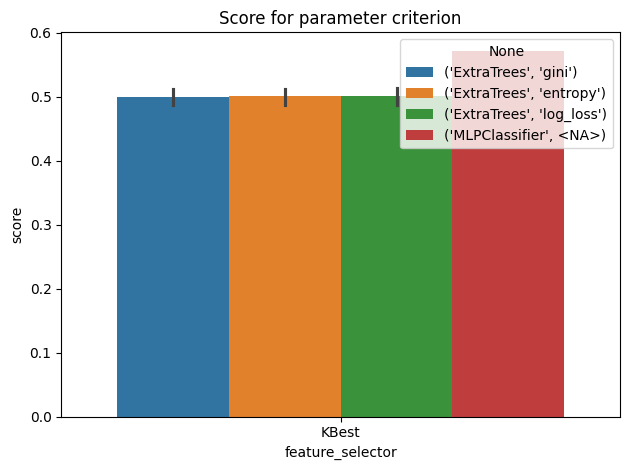

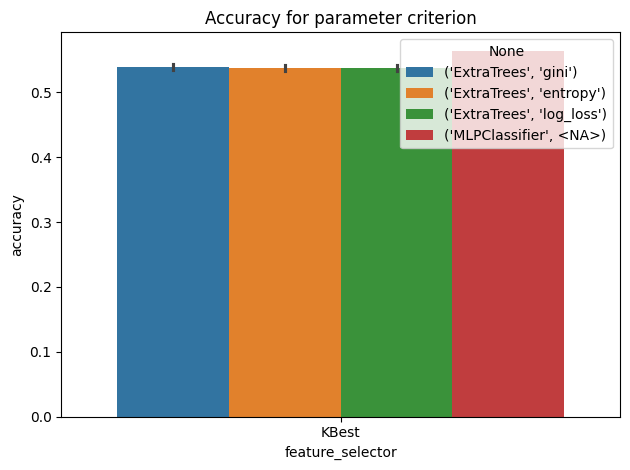

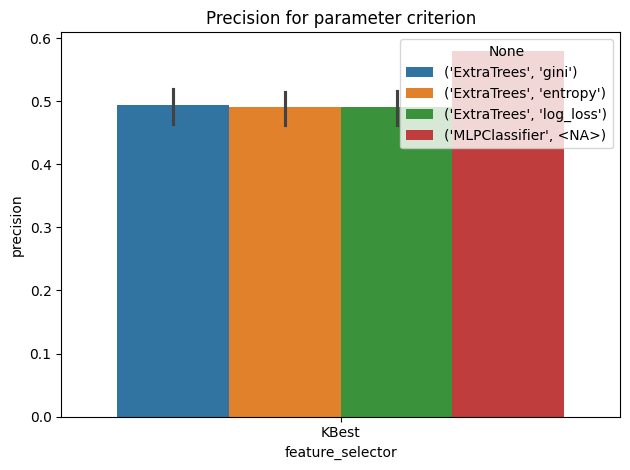

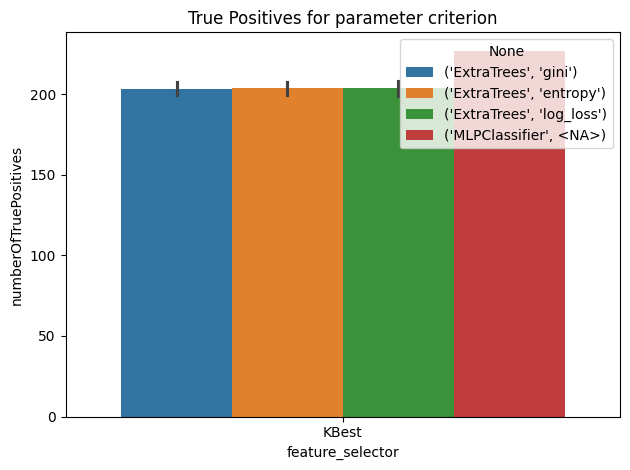

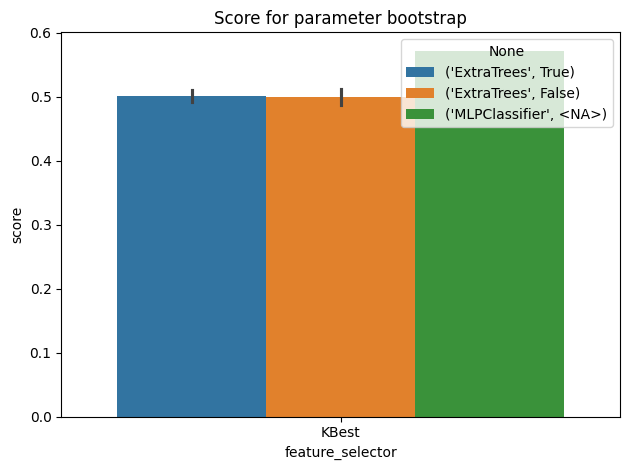

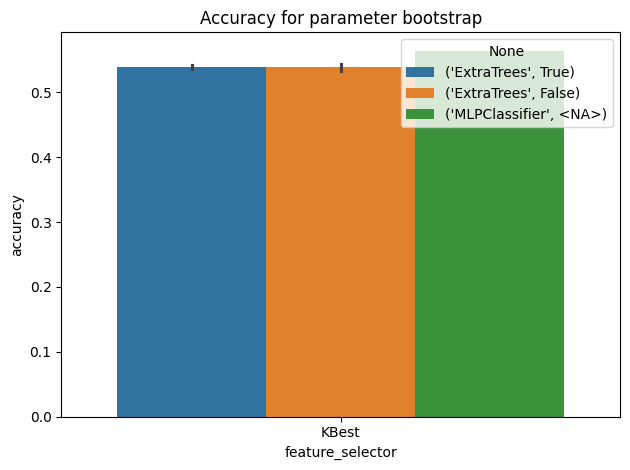

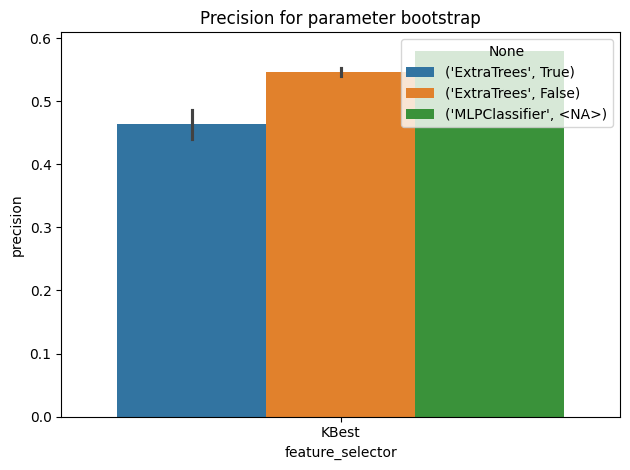

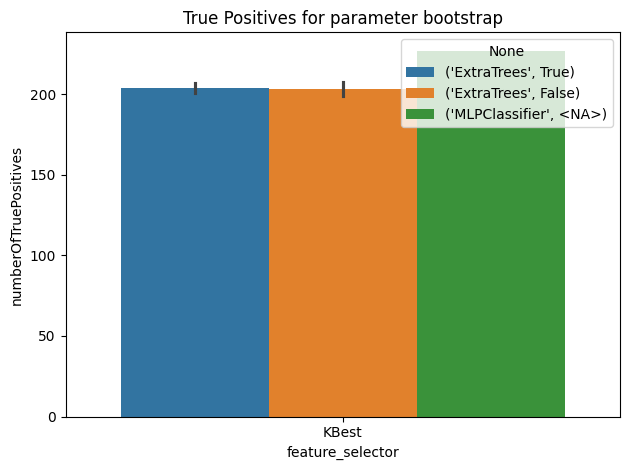

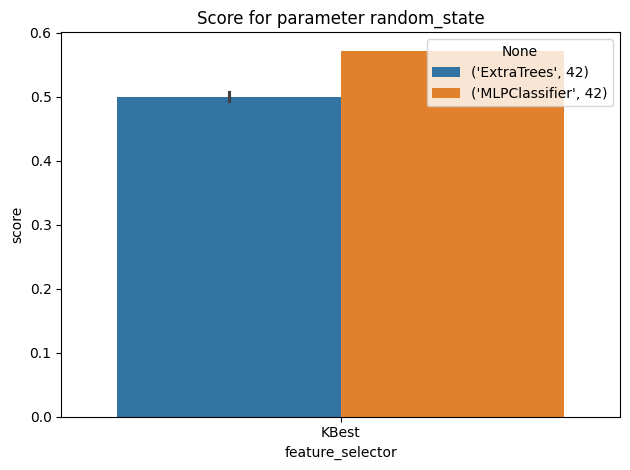

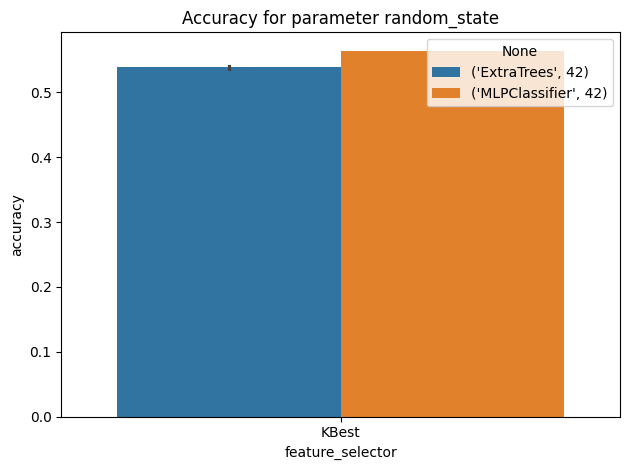

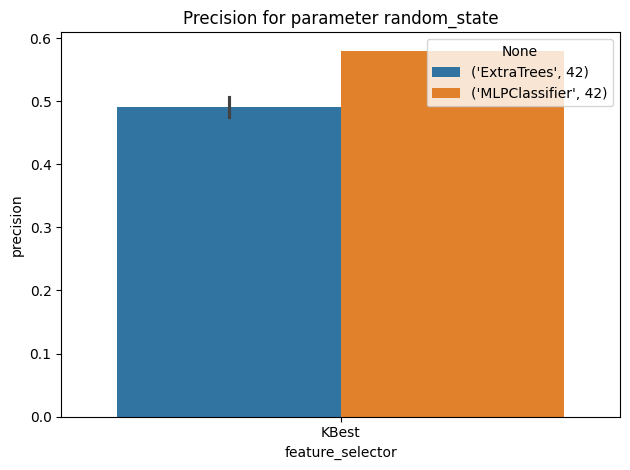

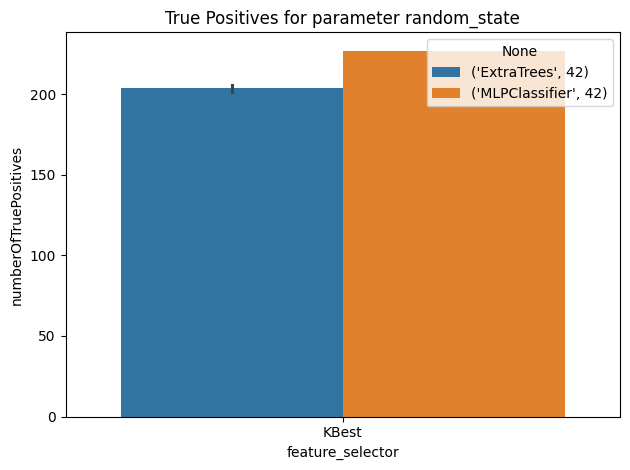

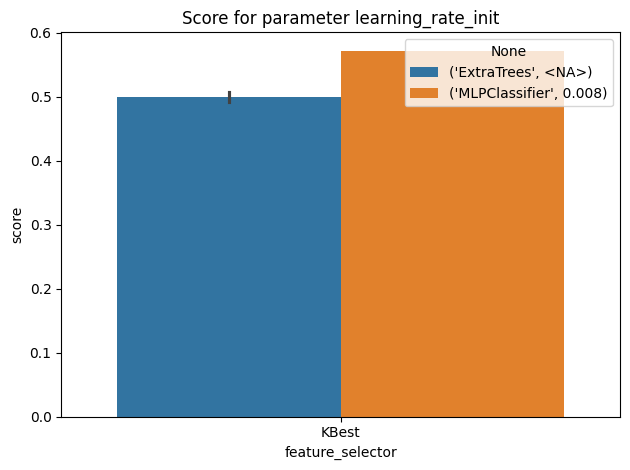

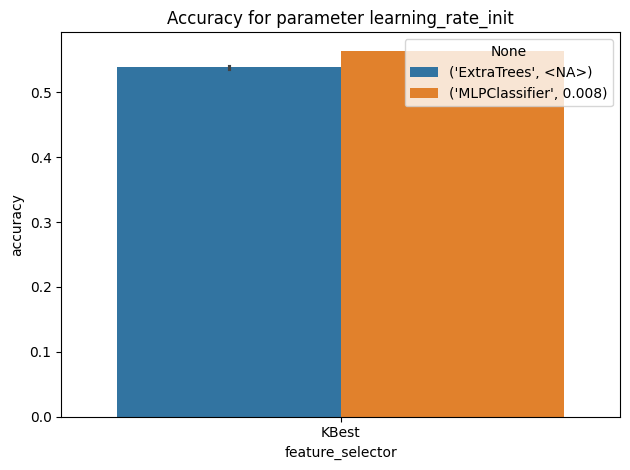

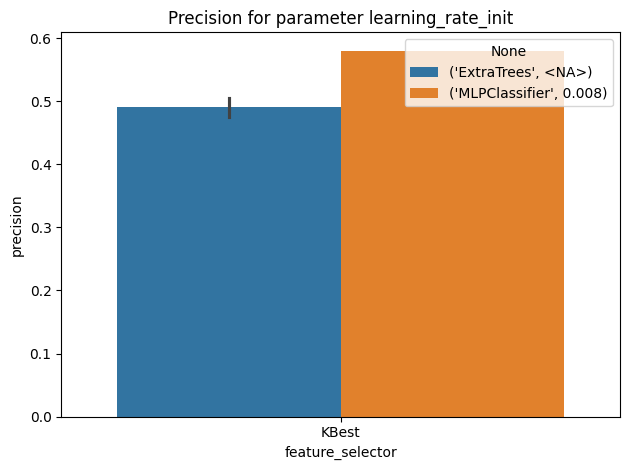

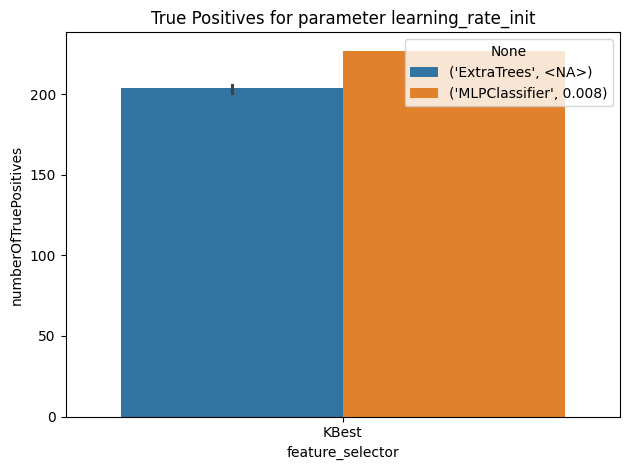

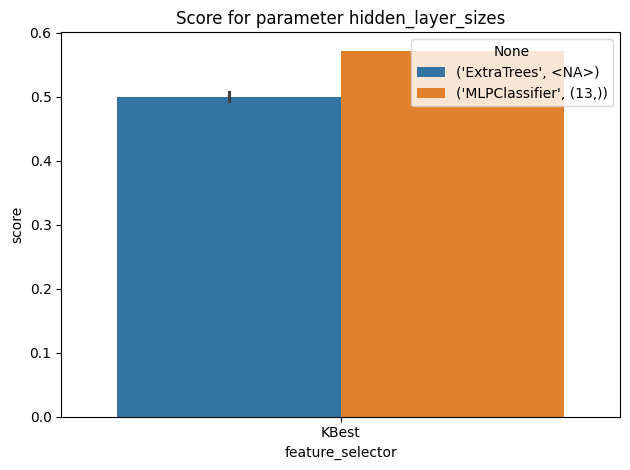

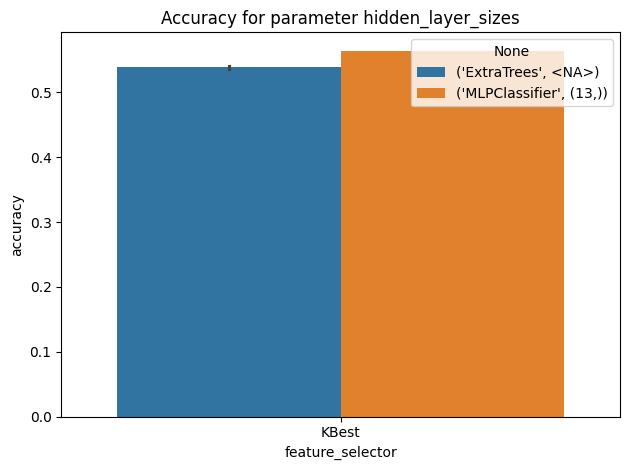

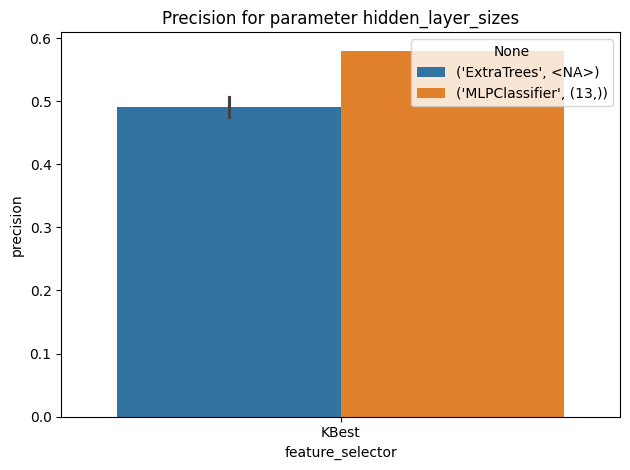

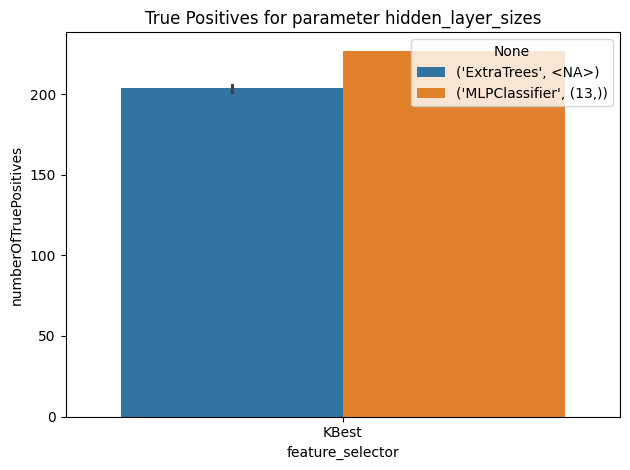

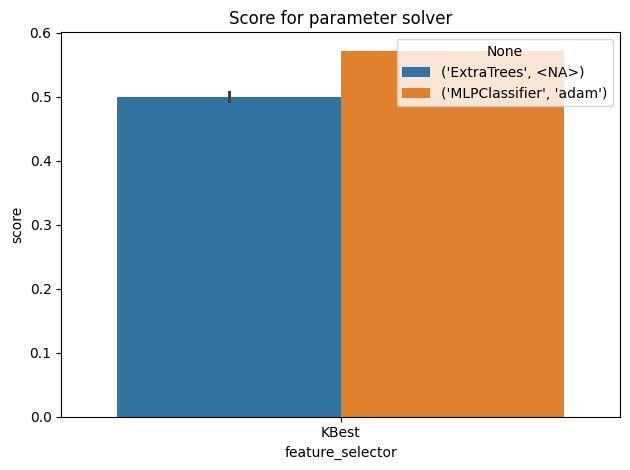

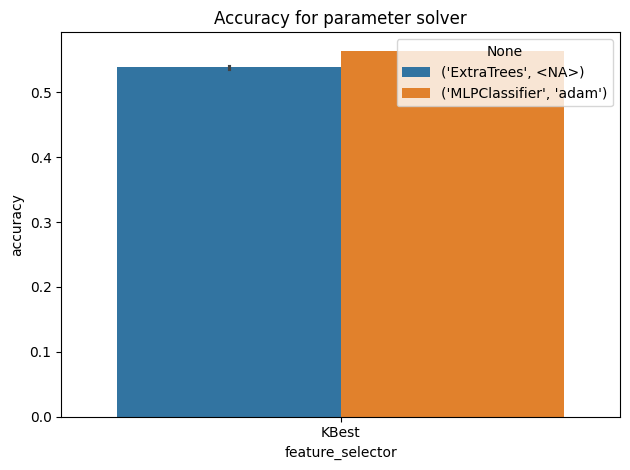

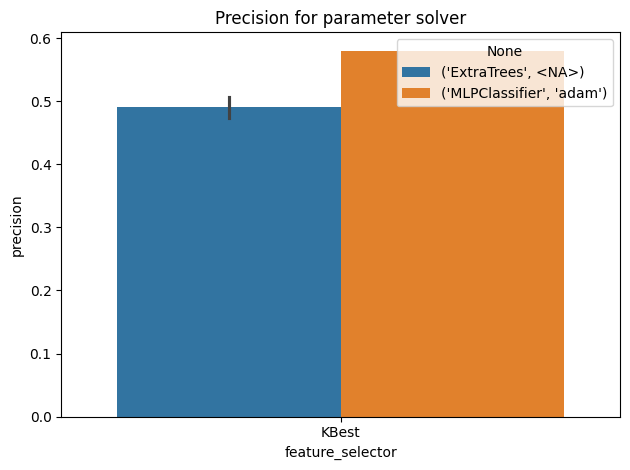

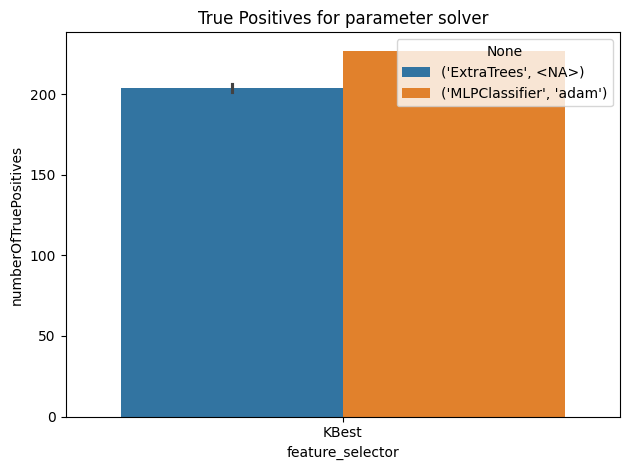

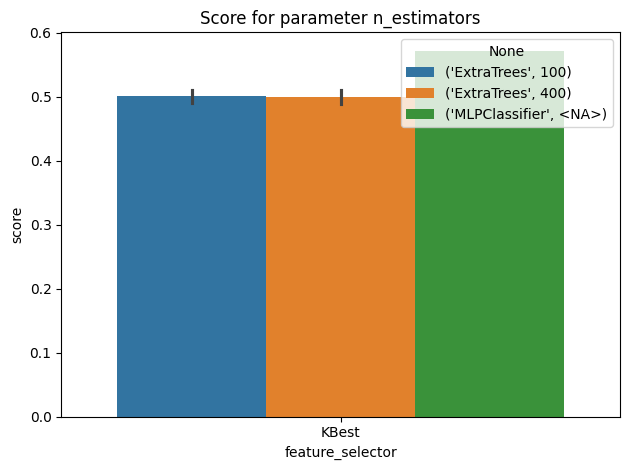

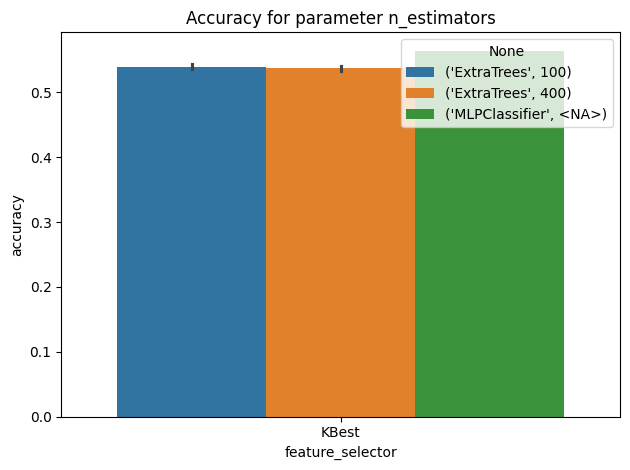

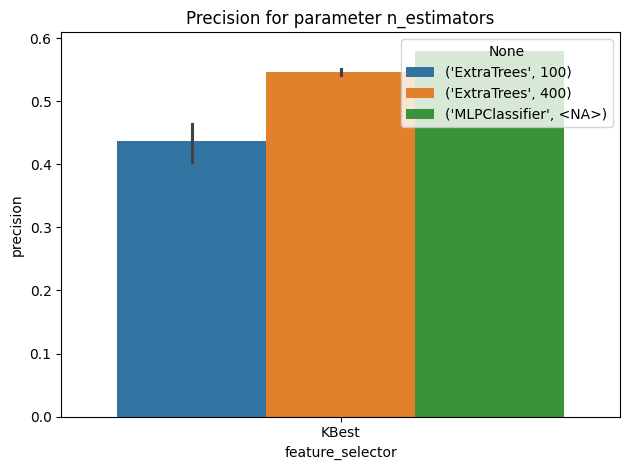

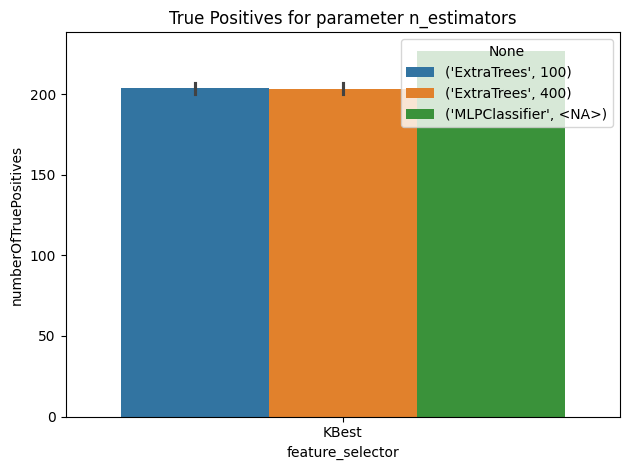

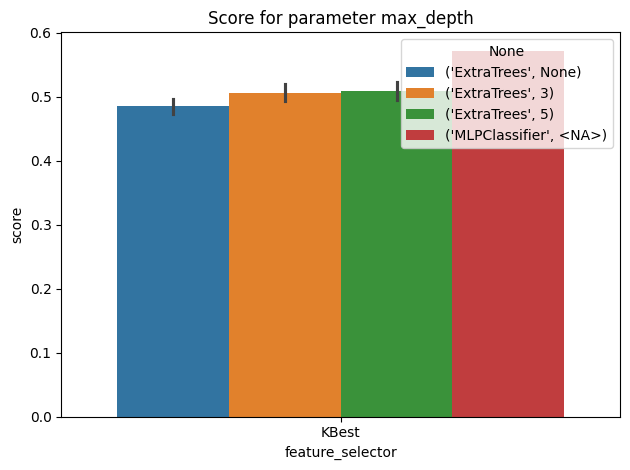

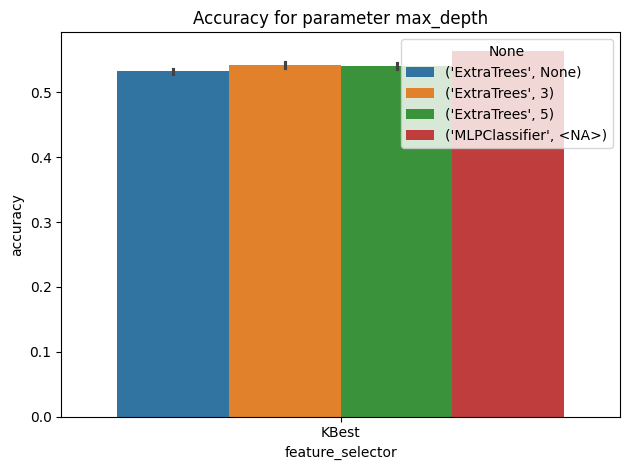

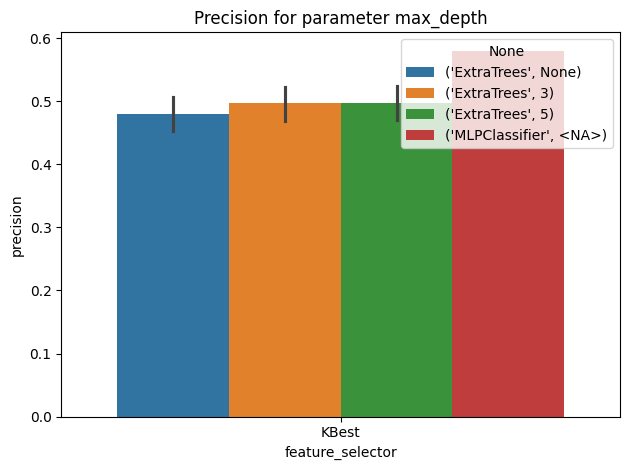

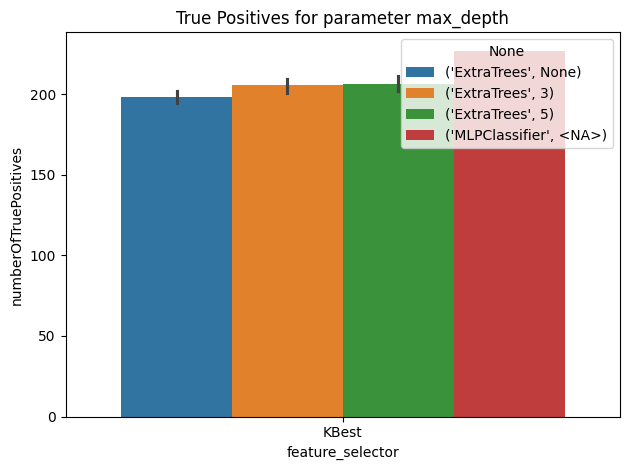

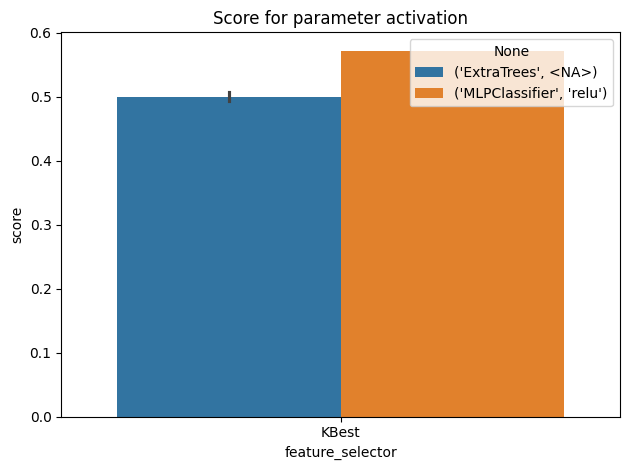

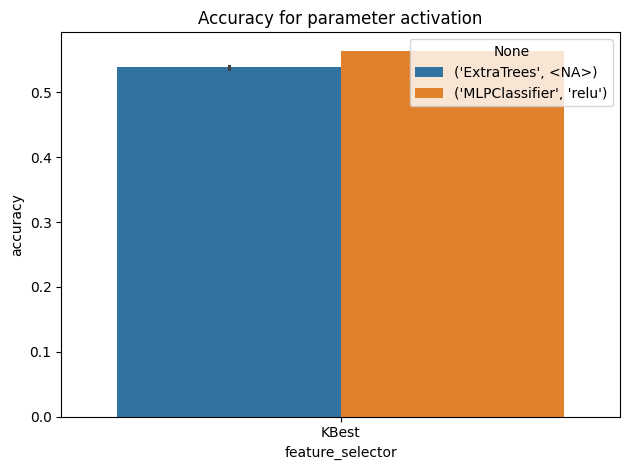

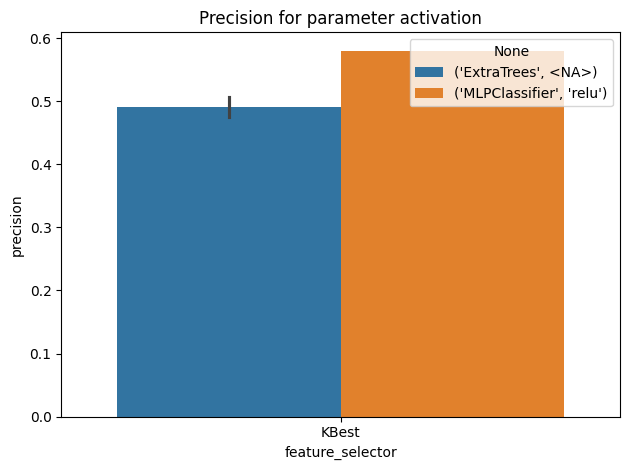

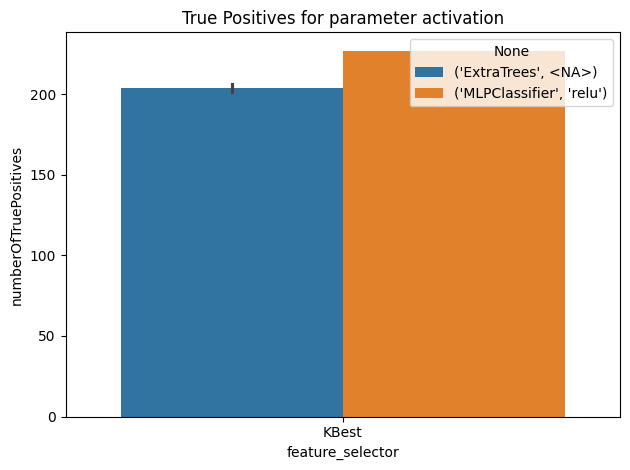

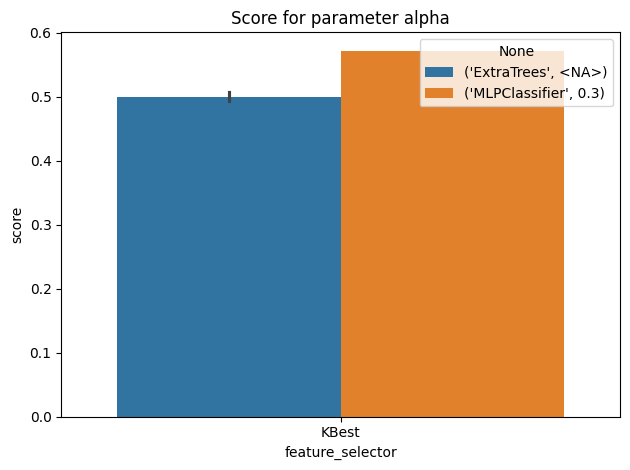

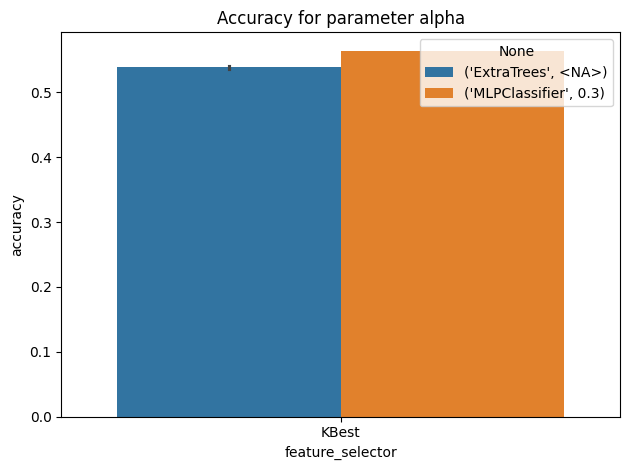

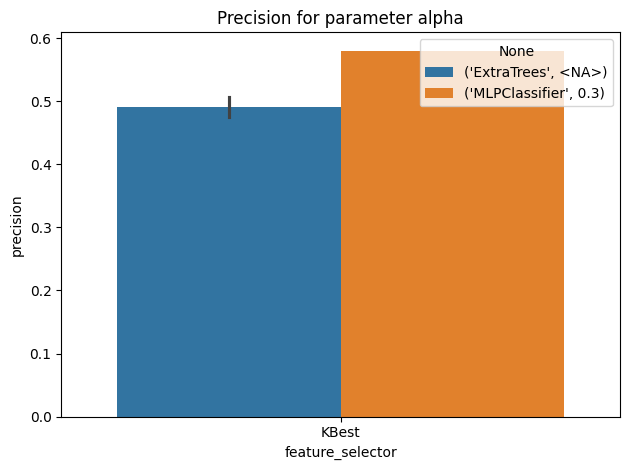

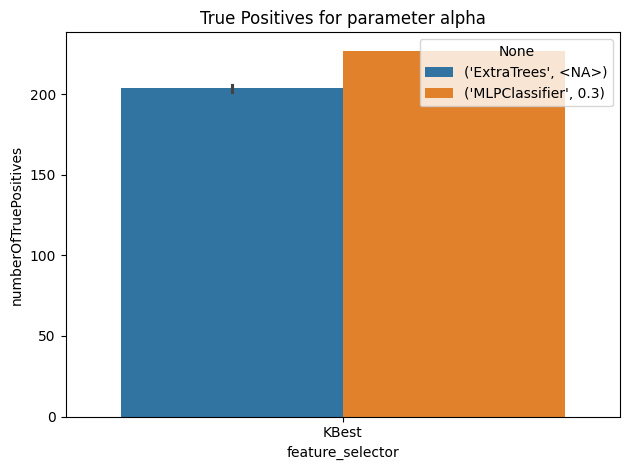

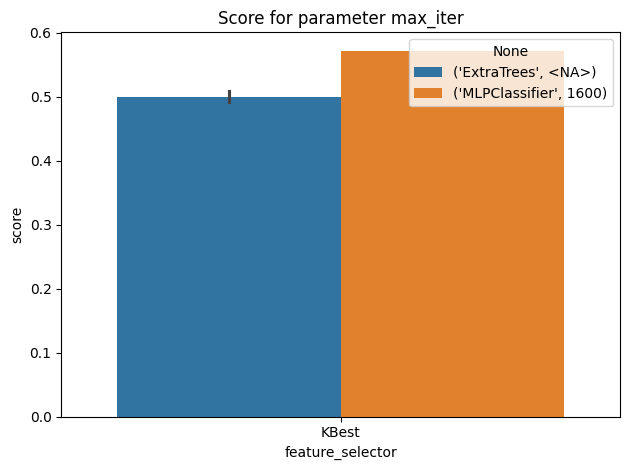

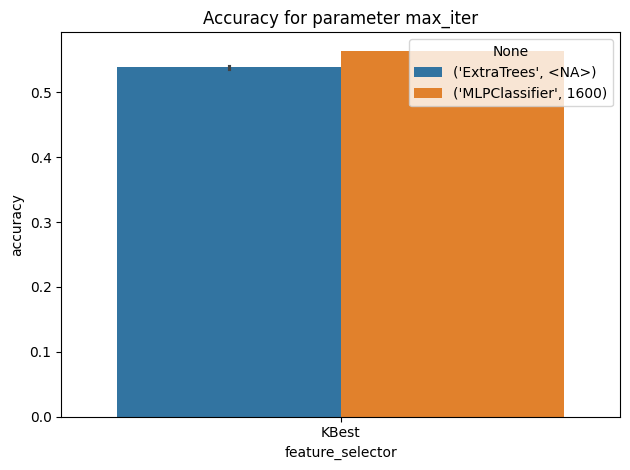

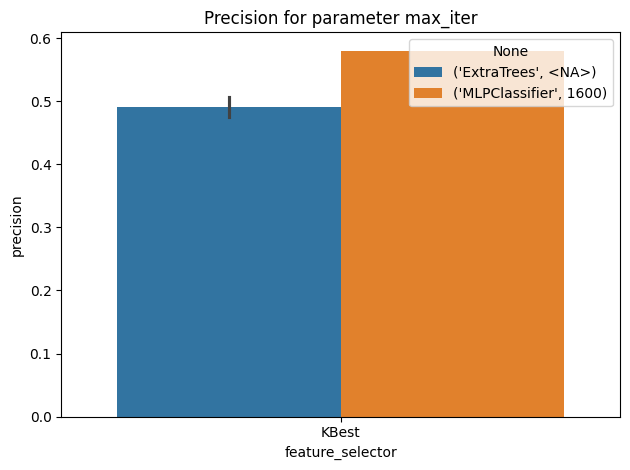

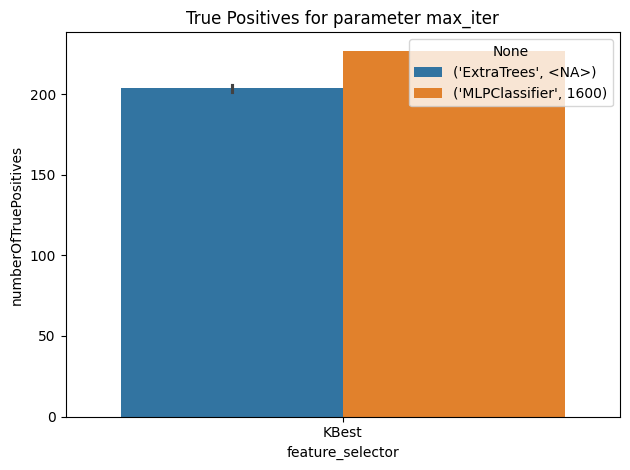

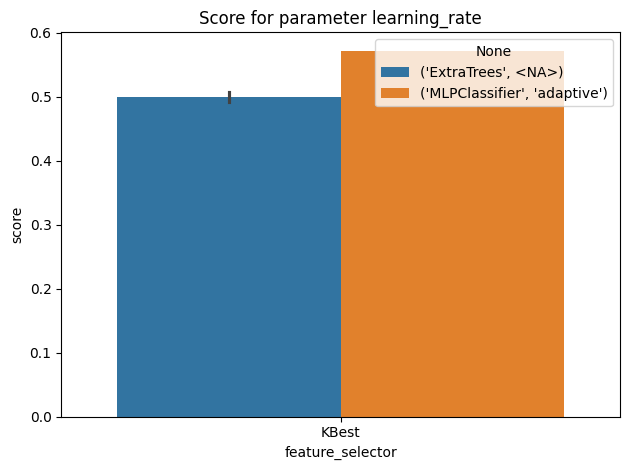

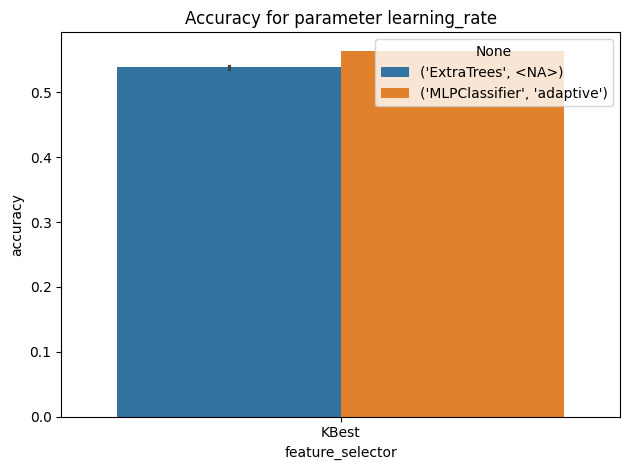

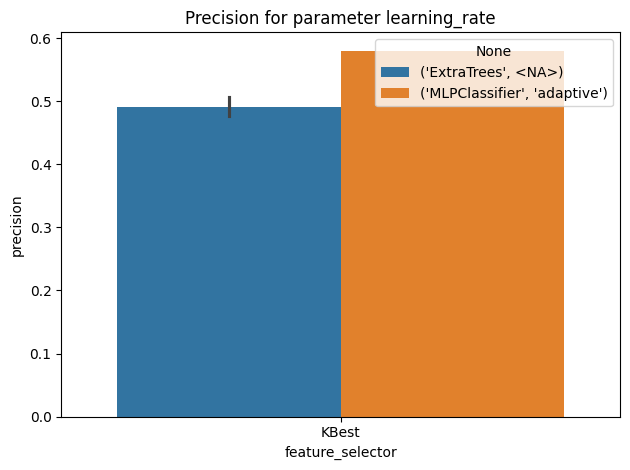

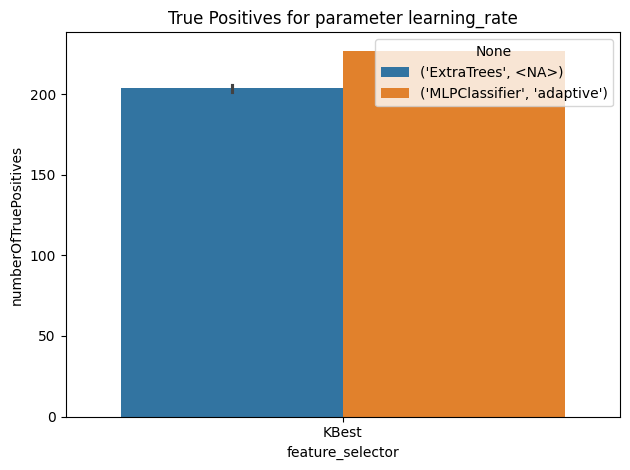

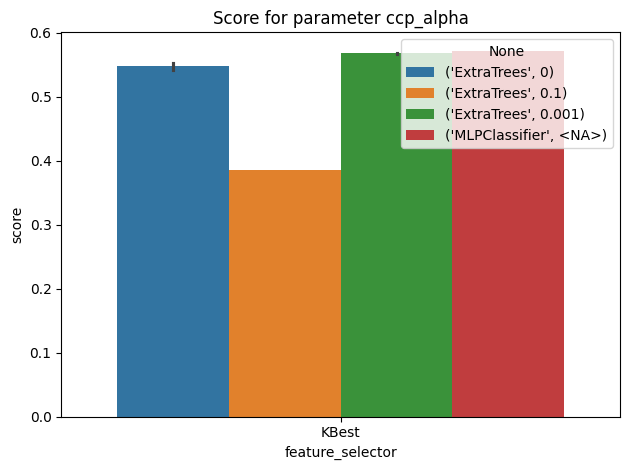

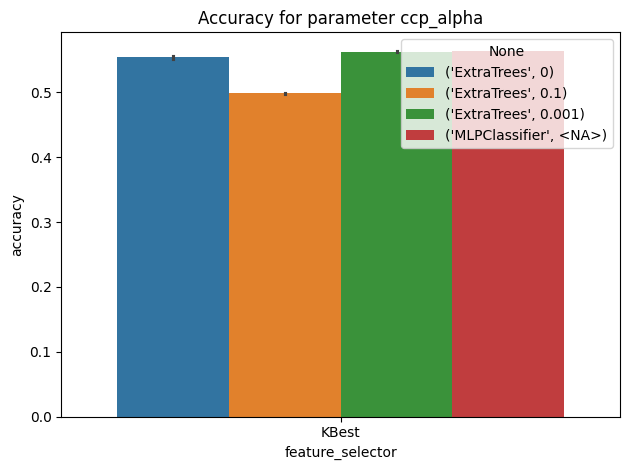

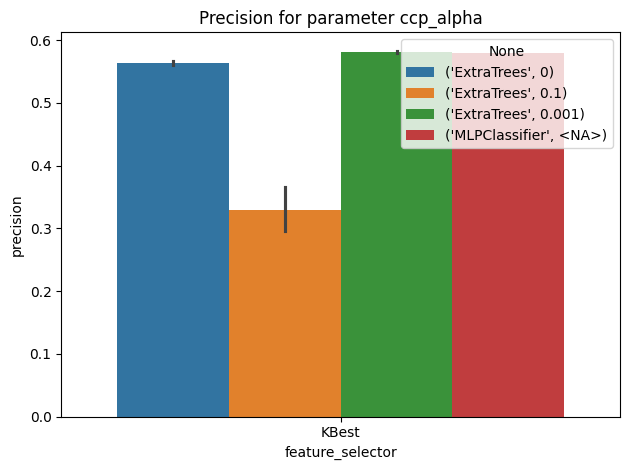

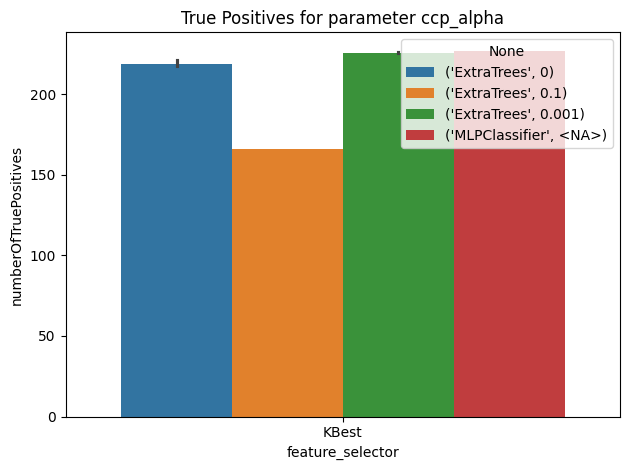

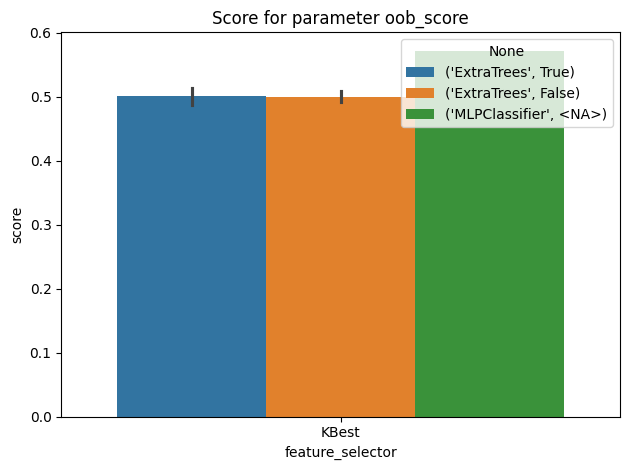

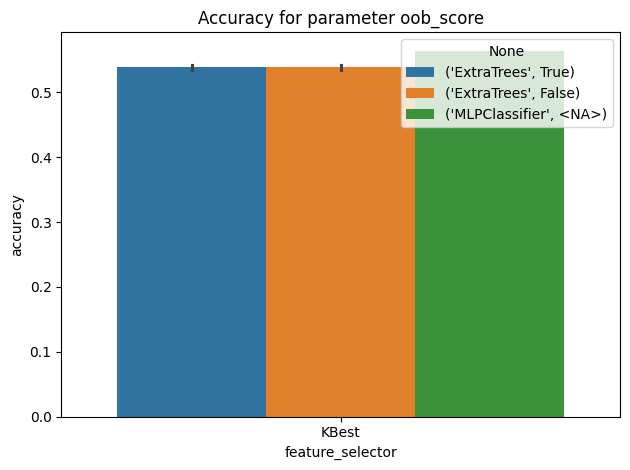

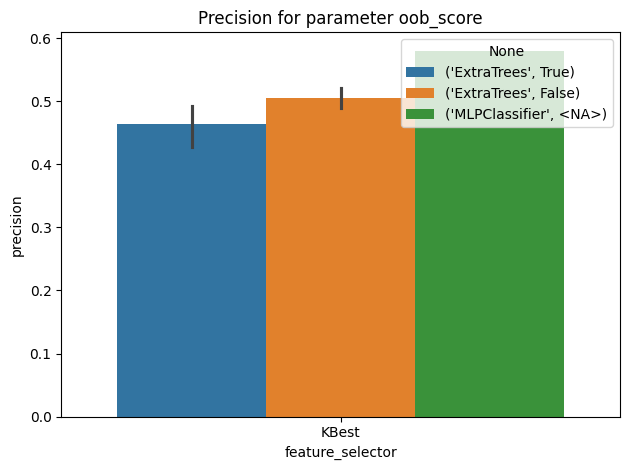

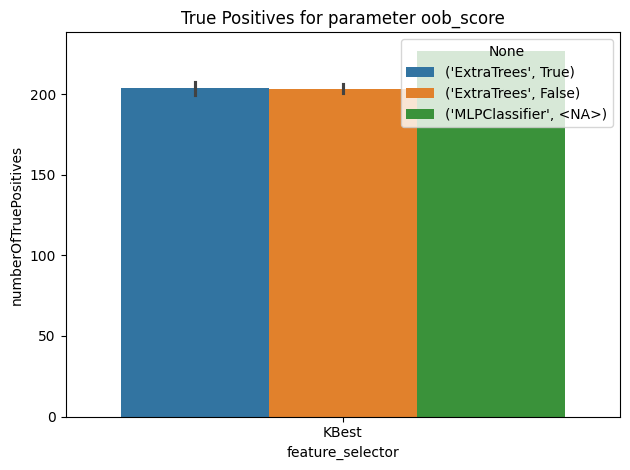

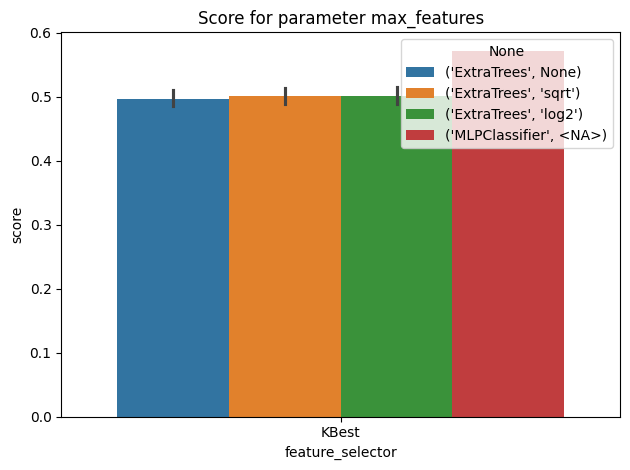

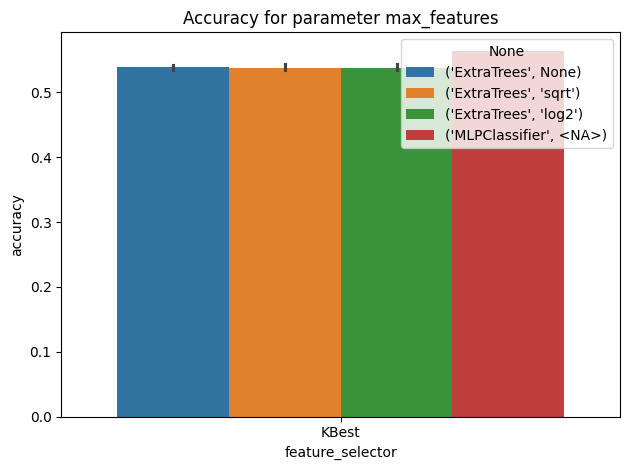

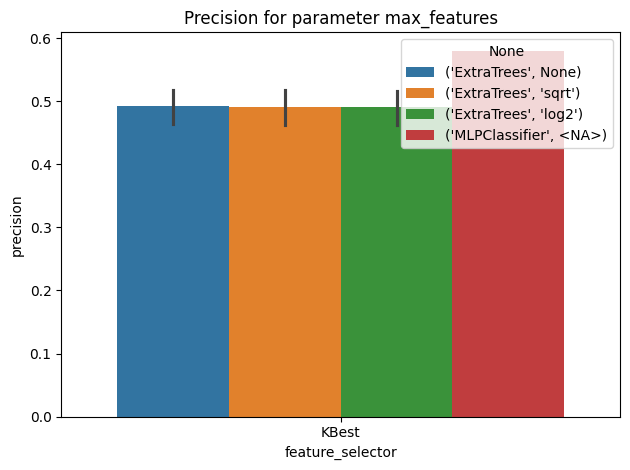

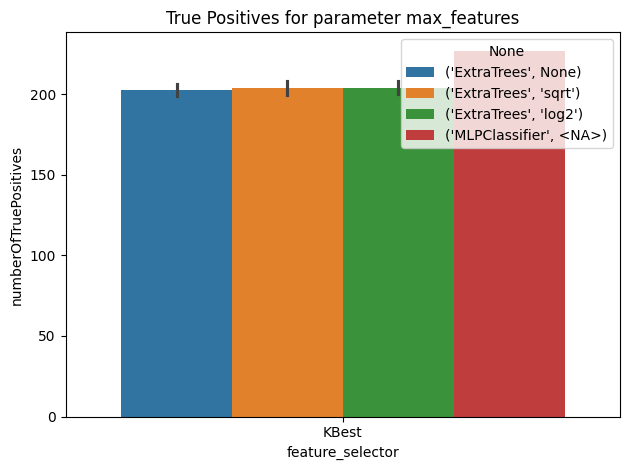

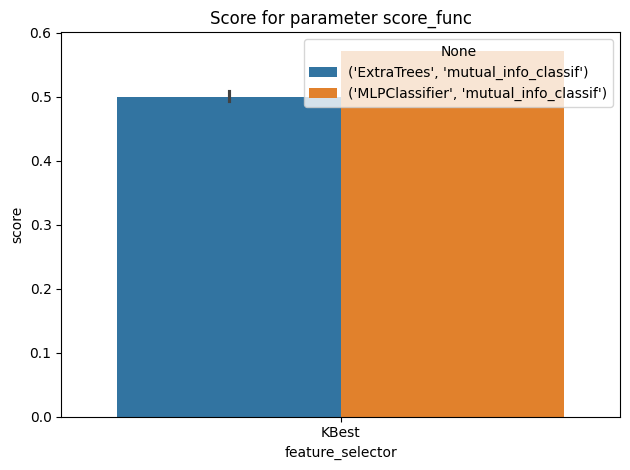

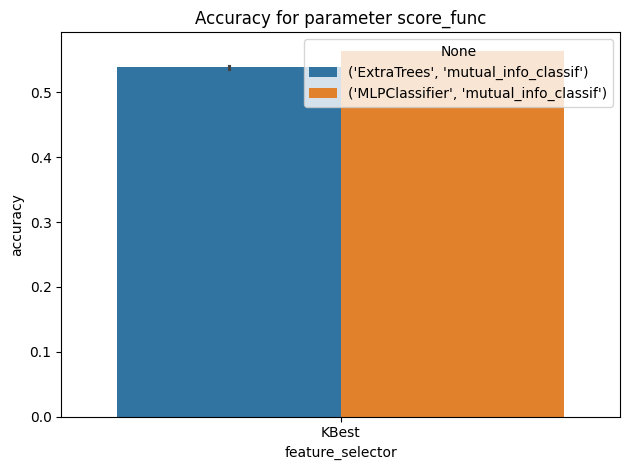

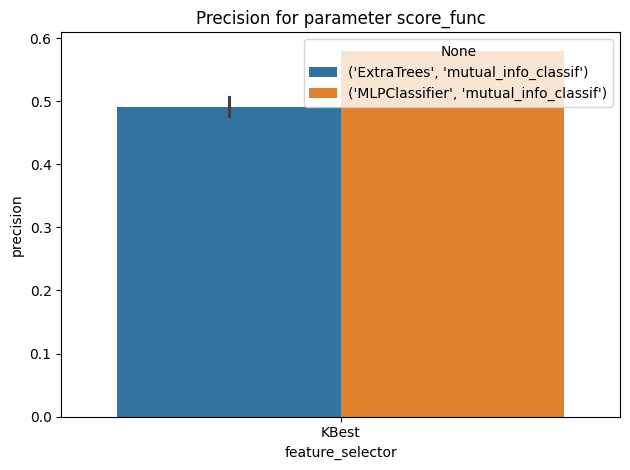

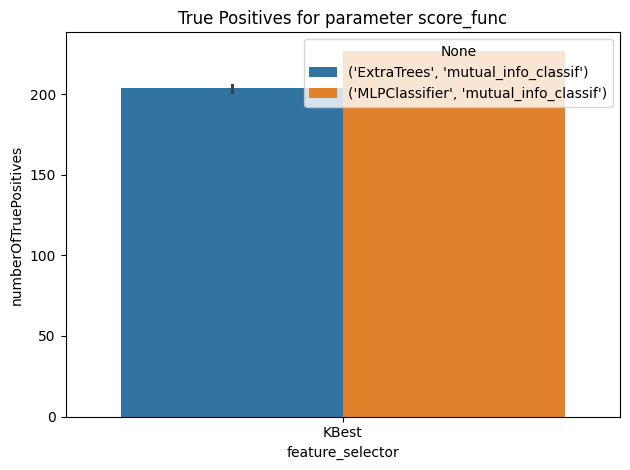

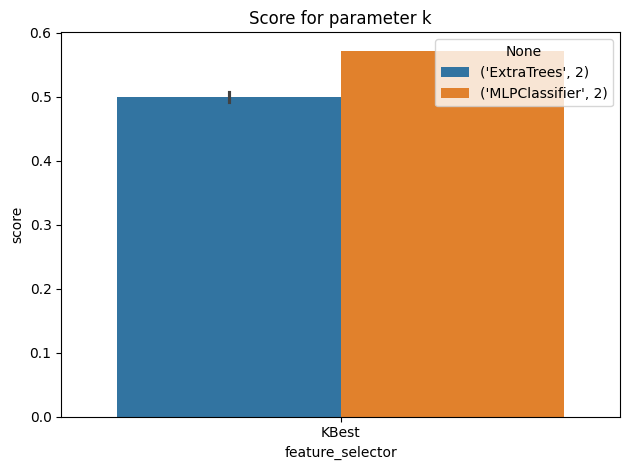

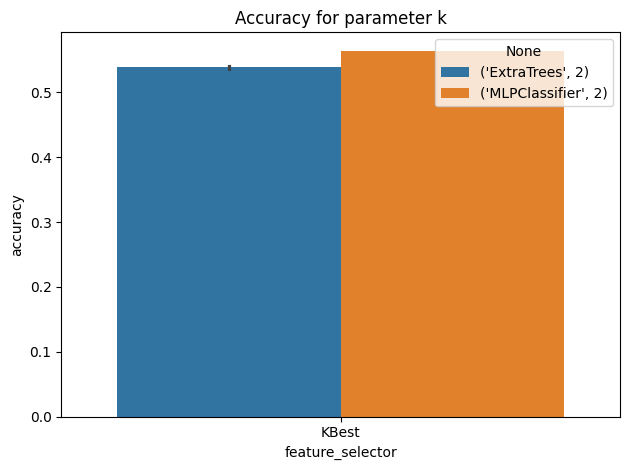

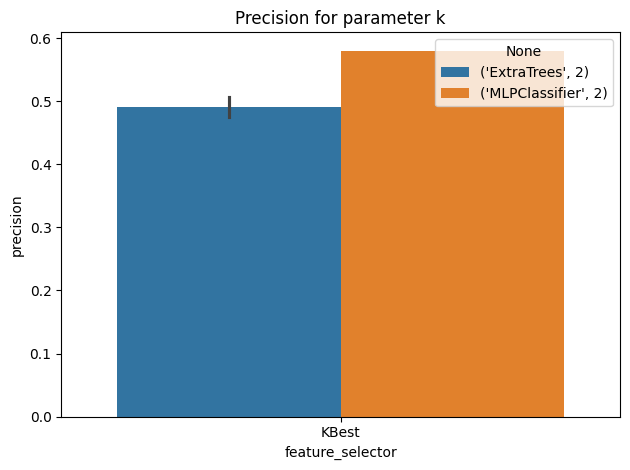

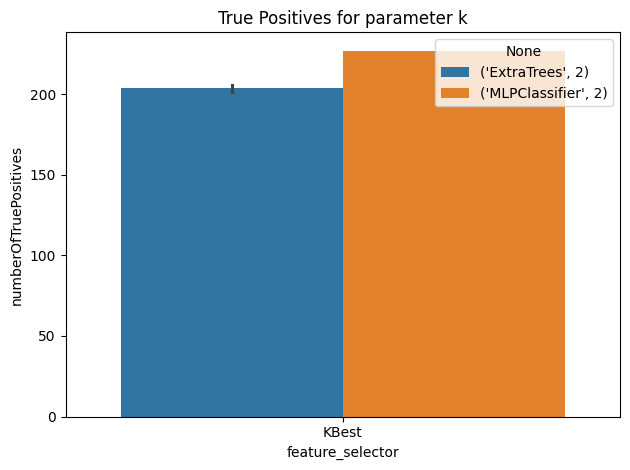

CPU times: total: 7.28 s
Wall time: 14.4 s


In [ ]:
%%time
processedResultsDf, parameters = functions.extractParameterResultsArr(
    resultsDf,
    [models, featureSelectors, scalers, featureGenerators],
    [
        "model_parameters",
        "selector_parameters",
        "scaler_parameters",
        "feature_generator_parameters",
    ],
)
functions.drawParameterResultsBarplot(processedResultsDf, parameters)

### Score/Accuracy by number of features

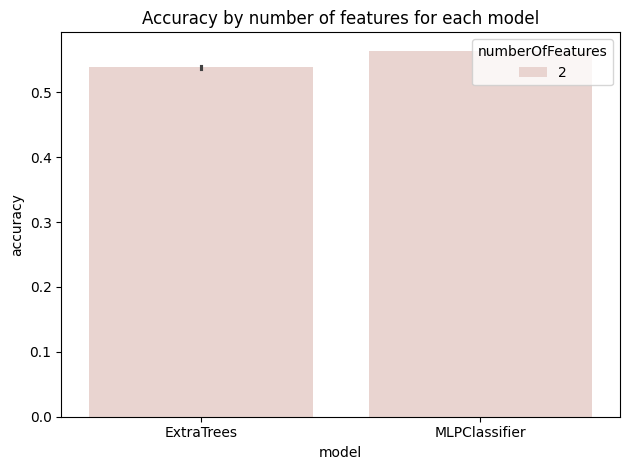

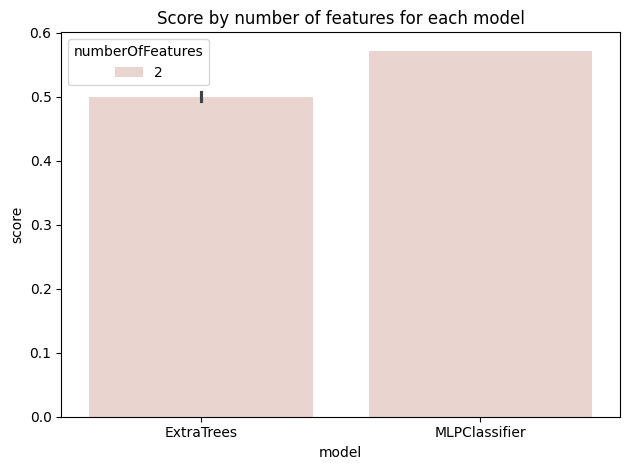

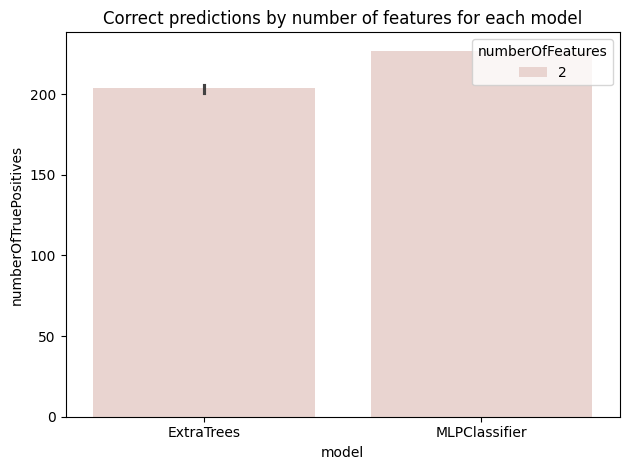

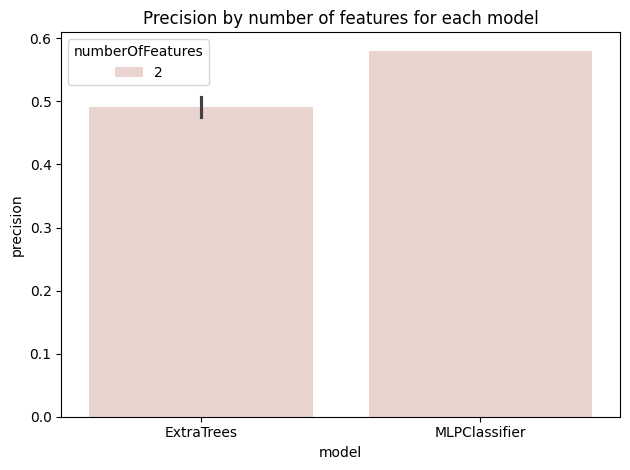

In [ ]:
functions.drawResultsPerNumberOfFeatures(processedResultsDf)

### Final Results for Feature Selectors

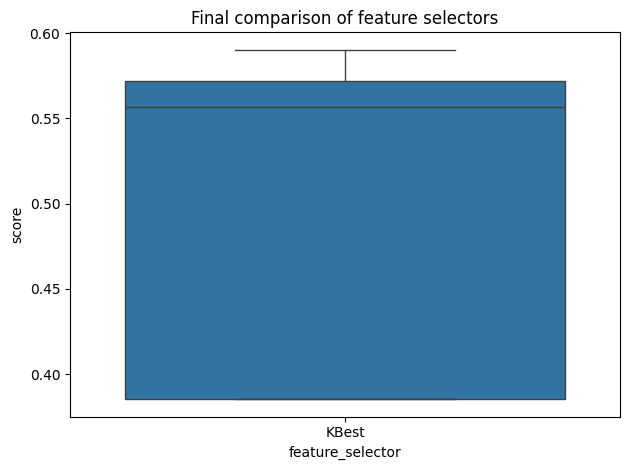

In [ ]:
plt.title("Final comparison of feature selectors")
sns.boxplot(data=processedResultsDf, x="feature_selector", y="score")

plt.tight_layout()
plt.show()

<Axes: xlabel='model', ylabel='score'>

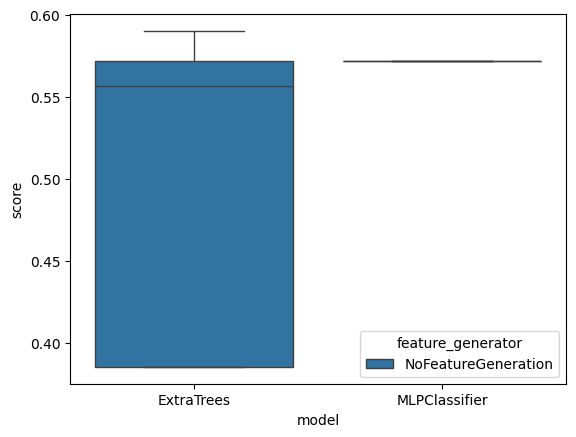

In [ ]:
sns.boxplot(data=processedResultsDf, x="model", y="score", hue="feature_generator")

<Axes: xlabel='model', ylabel='score'>

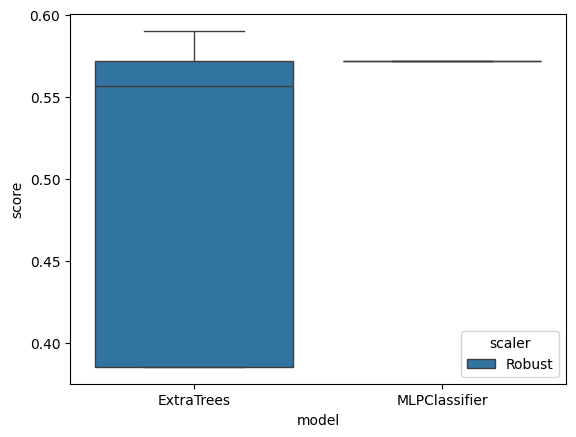

In [ ]:
sns.boxplot(data=processedResultsDf, x="model", y="score", hue="scaler")

### Final Results for Models

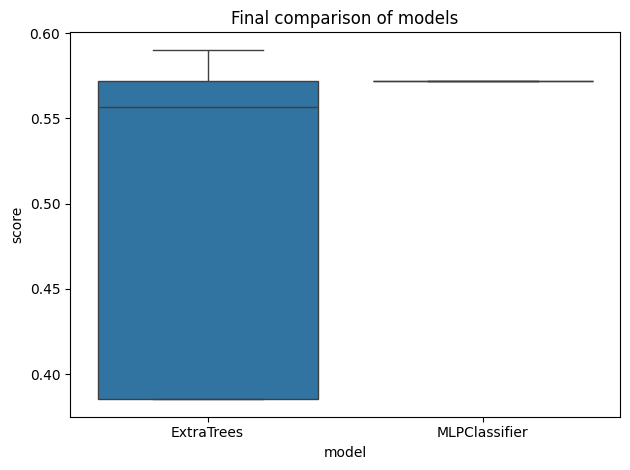

In [ ]:
plt.title("Final comparison of models")
sns.boxplot(data=processedResultsDf, x="model", y="score")
plt.tight_layout()
plt.show()

### Final Results

In [ ]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 1.71 ms


In [ ]:
processedResultsDf[
    processedResultsDf["model"] == functions.ModelType.XGBoost.name
].sort_values(by="score", ascending=False).head(5)

Empty DataFrame
Columns: [score, numberOfTruePositives, accuracy, precision, numberOfFeatures, model, model_parameters, feature_selector, selector_parameters, scaler, scaler_parameters, feature_generator, feature_generator_parameters, model_parameters_criterion, model_parameters_bootstrap, model_parameters_random_state, model_parameters_learning_rate_init, model_parameters_hidden_layer_sizes, model_parameters_solver, model_parameters_n_estimators, model_parameters_max_depth, model_parameters_activation, model_parameters_alpha, model_parameters_max_iter, model_parameters_learning_rate, model_parameters_ccp_alpha, model_parameters_oob_score, model_parameters_max_features, selector_parameters_score_func, selector_parameters_k]
Index: []

[0 rows x 30 columns]

In [ ]:
processedResultsDf.sort_values(by="numberOfTruePositives", ascending=False).head(5)

score  numberOfTruePositives  accuracy  precision  numberOfFeatures  \
147  0.590214                    233  0.563636   0.583333                 2   
237  0.590214                    233  0.563636   0.583333                 2   
66   0.590214                    233  0.563636   0.583333                 2   
234  0.590214                    233  0.563636   0.583333                 2   
72   0.590214                    233  0.563636   0.583333                 2   

          model                                   model_parameters  \
147  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
237  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
66   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
234  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
72   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   

    feature_selector                                selector_parameters  \
147            KBest  {'score_func': <function mutual_info_classif a...   
237            KBest  {'score_func': <function mutual_info_classif a...   
66             KBest  {'score_func': <function mutual_info_classif a...   
234            KBest  {'score_func': <function mutual_info_classif a...   
72             KBest  {'score_func': <function mutual_info_classif a...   

     scaler  ... model_parameters_max_depth model_parameters_activation  \
147  Robust  ...                          5                        <NA>   
237  Robust  ...                          5                        <NA>   
66   Robust  ...                          5                        <NA>   
234  Robust  ...                          5                        <NA>   
72   Robust  ...                          5                        <NA>   

    model_parameters_alpha model_parameters_max_iter  \
147                   <NA>                      <NA>   
237                   <NA>                      <NA>   
66                    <NA>                      <NA>   
234                   <NA>                      <NA>   
72                    <NA>                      <NA>   

    model_parameters_learning_rate  model_parameters_ccp_alpha  \
147                           <NA>                           0   
237                           <NA>                           0   
66                            <NA>                           0   
234                           <NA>                           0   
72                            <NA>                           0   

    model_parameters_oob_score model_parameters_max_features  \
147                      False                          sqrt   
237                      False                          log2   
66                       False                          sqrt   
234                       True                          log2   
72                        True                          log2   

    selector_parameters_score_func selector_parameters_k  
147            mutual_info_classif                     2  
237            mutual_info_classif                     2  
66             mutual_info_classif                     2  
234            mutual_info_classif                     2  
72             mutual_info_classif                     2  

[5 rows x 30 columns]

In [ ]:
processedResultsDf[
    processedResultsDf["feature_generator"]
    == functions.FeatureGenerator.Polynomial.name
].sort_values(by="numberOfTruePositives", ascending=False).head(5)

Empty DataFrame
Columns: [score, numberOfTruePositives, accuracy, precision, numberOfFeatures, model, model_parameters, feature_selector, selector_parameters, scaler, scaler_parameters, feature_generator, feature_generator_parameters, model_parameters_criterion, model_parameters_bootstrap, model_parameters_random_state, model_parameters_learning_rate_init, model_parameters_hidden_layer_sizes, model_parameters_solver, model_parameters_n_estimators, model_parameters_max_depth, model_parameters_activation, model_parameters_alpha, model_parameters_max_iter, model_parameters_learning_rate, model_parameters_ccp_alpha, model_parameters_oob_score, model_parameters_max_features, selector_parameters_score_func, selector_parameters_k]
Index: []

[0 rows x 30 columns]

In [ ]:
processedResultsDf[
    processedResultsDf["scaler"] == functions.Scaler.NoScaling.name
].sort_values(by="score", ascending=False).head(5)

Empty DataFrame
Columns: [score, numberOfTruePositives, accuracy, precision, numberOfFeatures, model, model_parameters, feature_selector, selector_parameters, scaler, scaler_parameters, feature_generator, feature_generator_parameters, model_parameters_criterion, model_parameters_bootstrap, model_parameters_random_state, model_parameters_learning_rate_init, model_parameters_hidden_layer_sizes, model_parameters_solver, model_parameters_n_estimators, model_parameters_max_depth, model_parameters_activation, model_parameters_alpha, model_parameters_max_iter, model_parameters_learning_rate, model_parameters_ccp_alpha, model_parameters_oob_score, model_parameters_max_features, selector_parameters_score_func, selector_parameters_k]
Index: []

[0 rows x 30 columns]

In [ ]:
filteredDf["scaler"]

63     Robust
66     Robust
72     Robust
75     Robust
144    Robust
147    Robust
153    Robust
156    Robust
225    Robust
228    Robust
234    Robust
237    Robust
Name: scaler, dtype: object

In [ ]:
filteredDf["model_parameters"].to_numpy()

array([{'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0},
 

In [ ]:
filteredDf["feature_generator"]

63     NoFeatureGeneration
66     NoFeatureGeneration
72     NoFeatureGeneration
75     NoFeatureGeneration
144    NoFeatureGeneration
147    NoFeatureGeneration
153    NoFeatureGeneration
156    NoFeatureGeneration
225    NoFeatureGeneration
228    NoFeatureGeneration
234    NoFeatureGeneration
237    NoFeatureGeneration
Name: feature_generator, dtype: object

In [ ]:
filteredDf

score  numberOfTruePositives  accuracy  precision  numberOfFeatures  \
63   0.590214                    233  0.563636   0.583333                 2   
66   0.590214                    233  0.563636   0.583333                 2   
72   0.590214                    233  0.563636   0.583333                 2   
75   0.590214                    233  0.563636   0.583333                 2   
144  0.590214                    233  0.563636   0.583333                 2   
147  0.590214                    233  0.563636   0.583333                 2   
153  0.590214                    233  0.563636   0.583333                 2   
156  0.590214                    233  0.563636   0.583333                 2   
225  0.590214                    233  0.563636   0.583333                 2   
228  0.590214                    233  0.563636   0.583333                 2   
234  0.590214                    233  0.563636   0.583333                 2   
237  0.590214                    233  0.563636   0.583333                 2   

          model                                   model_parameters  \
63   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
66   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
72   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
75   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
144  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
147  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
153  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
156  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
225  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
228  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
234  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
237  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   

    feature_selector                                selector_parameters  \
63             KBest  {'score_func': <function mutual_info_classif a...   
66             KBest  {'score_func': <function mutual_info_classif a...   
72             KBest  {'score_func': <function mutual_info_classif a...   
75             KBest  {'score_func': <function mutual_info_classif a...   
144            KBest  {'score_func': <function mutual_info_classif a...   
147            KBest  {'score_func': <function mutual_info_classif a...   
153            KBest  {'score_func': <function mutual_info_classif a...   
156            KBest  {'score_func': <function mutual_info_classif a...   
225            KBest  {'score_func': <function mutual_info_classif a...   
228            KBest  {'score_func': <function mutual_info_classif a...   
234            KBest  {'score_func': <function mutual_info_classif a...   
237            KBest  {'score_func': <function mutual_info_classif a...   

     scaler  ... model_parameters_max_depth model_parameters_activation  \
63   Robust  ...                          5                        <NA>   
66   Robust  ...                          5                        <NA>   
72   Robust  ...                          5                        <NA>   
75   Robust  ...                          5                        <NA>   
144  Robust  ...                          5                        <NA>   
147  Robust  ...                          5                        <NA>   
153  Robust  ...                          5                        <NA>   
156  Robust  ...                          5                        <NA>   
225  Robust  ...                          5                        <NA>   
228  Robust  ...                          5                        <NA>   
234  Robust  ...                          5                        <NA>   
237  Robust  ...                          5                        <NA>   

    model_parameters_alpha model_parameters_max_iter  \
63                    <NA>                      <NA>   
66   

In [ ]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
processedResultsDf[
    processedResultsDf["scaler"] == functions.Scaler.NoScaling.name
].sort_values(by="score", ascending=False).head(5)

Empty DataFrame
Columns: [score, numberOfTruePositives, accuracy, precision, numberOfFeatures, model, model_parameters, feature_selector, selector_parameters, scaler, scaler_parameters, feature_generator, feature_generator_parameters, model_parameters_criterion, model_parameters_bootstrap, model_parameters_random_state, model_parameters_learning_rate_init, model_parameters_hidden_layer_sizes, model_parameters_solver, model_parameters_n_estimators, model_parameters_max_depth, model_parameters_activation, model_parameters_alpha, model_parameters_max_iter, model_parameters_learning_rate, model_parameters_ccp_alpha, model_parameters_oob_score, model_parameters_max_features, selector_parameters_score_func, selector_parameters_k]
Index: []

[0 rows x 30 columns]

In [ ]:
filteredDf["scaler"]

63     Robust
66     Robust
72     Robust
75     Robust
144    Robust
147    Robust
153    Robust
156    Robust
225    Robust
228    Robust
234    Robust
237    Robust
Name: scaler, dtype: object

In [ ]:
filteredDf["model_parameters"].to_numpy()

array([{'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'ccp_alpha': 0},
       {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'ccp_alpha': 0},
 

In [ ]:
filteredDf["feature_generator"]

63     NoFeatureGeneration
66     NoFeatureGeneration
72     NoFeatureGeneration
75     NoFeatureGeneration
144    NoFeatureGeneration
147    NoFeatureGeneration
153    NoFeatureGeneration
156    NoFeatureGeneration
225    NoFeatureGeneration
228    NoFeatureGeneration
234    NoFeatureGeneration
237    NoFeatureGeneration
Name: feature_generator, dtype: object

In [ ]:
filteredDf

score  numberOfTruePositives  accuracy  precision  numberOfFeatures  \
63   0.590214                    233  0.563636   0.583333                 2   
66   0.590214                    233  0.563636   0.583333                 2   
72   0.590214                    233  0.563636   0.583333                 2   
75   0.590214                    233  0.563636   0.583333                 2   
144  0.590214                    233  0.563636   0.583333                 2   
147  0.590214                    233  0.563636   0.583333                 2   
153  0.590214                    233  0.563636   0.583333                 2   
156  0.590214                    233  0.563636   0.583333                 2   
225  0.590214                    233  0.563636   0.583333                 2   
228  0.590214                    233  0.563636   0.583333                 2   
234  0.590214                    233  0.563636   0.583333                 2   
237  0.590214                    233  0.563636   0.583333                 2   

          model                                   model_parameters  \
63   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
66   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
72   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
75   ExtraTrees  {'n_estimators': 100, 'criterion': 'gini', 'ma...   
144  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
147  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
153  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
156  ExtraTrees  {'n_estimators': 100, 'criterion': 'entropy', ...   
225  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
228  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
234  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   
237  ExtraTrees  {'n_estimators': 100, 'criterion': 'log_loss',...   

    feature_selector                                selector_parameters  \
63             KBest  {'score_func': <function mutual_info_classif a...   
66             KBest  {'score_func': <function mutual_info_classif a...   
72             KBest  {'score_func': <function mutual_info_classif a...   
75             KBest  {'score_func': <function mutual_info_classif a...   
144            KBest  {'score_func': <function mutual_info_classif a...   
147            KBest  {'score_func': <function mutual_info_classif a...   
153            KBest  {'score_func': <function mutual_info_classif a...   
156            KBest  {'score_func': <function mutual_info_classif a...   
225            KBest  {'score_func': <function mutual_info_classif a...   
228            KBest  {'score_func': <function mutual_info_classif a...   
234            KBest  {'score_func': <function mutual_info_classif a...   
237            KBest  {'score_func': <function mutual_info_classif a...   

     scaler  ... model_parameters_max_depth model_parameters_activation  \
63   Robust  ...                          5                        <NA>   
66   Robust  ...                          5                        <NA>   
72   Robust  ...                          5                        <NA>   
75   Robust  ...                          5                        <NA>   
144  Robust  ...                          5                        <NA>   
147  Robust  ...                          5                        <NA>   
153  Robust  ...                          5                        <NA>   
156  Robust  ...                          5                        <NA>   
225  Robust  ...                          5                        <NA>   
228  Robust  ...                          5                        <NA>   
234  Robust  ...                          5                        <NA>   
237  Robust  ...                          5                        <NA>   

    model_parameters_alpha model_parameters_max_iter  \
63                    <NA>                      <NA>   
66   